# (20/01) MScFE 690 Capstone (C18-S3T5) #
### Osifo Ernest – Osifo.e@gmail.com ###
**Date:5 MARCH 2020**



### PROJECT :CRYPTOCURRENCY TRADING-PAIR FORECASTING, USING MACHINE LEARNING AND DEEP LEARNING TECHNIQUE. ###


**1. SELECTION OF PAIR CRYPTOCURRENCIES**

In this project, we attempt to forecast cryptocurrency price and design a strategy that will advantage of the statistical arbitrage via paired crypto-currency trading.
Our task is divided into the following three major steps


*1.Get the Pair currencies; Find the most correlated cryptocurrency to our base Currency (Bitcoin)*

*2.Forecast Adjusted price for selected pair*

*3.Develop a proposed trading strategy* 


***GETTING THE PAIR CURRENCIES***


In [1]:
#import packages
import pandas as pd
import numpy as np
import glob,os
import matplotlib.dates as mdates

#to plot within notebook
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn

#to set seed
np.random.seed(0) # for reproducibility

from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_pacf
import statsmodels.tsa.stattools as ts 
from statsmodels.tsa.vector_ar.vecm import coint_johansen
#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

#importing required libraries for Forecasting 
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

from pmdarima.arima import auto_arima
#for normalizing data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

#for cointegration test 
from statsmodels.tsa.stattools import coint

import scipy


#read the file
import pandas_datareader as pdr
from datetime import datetime
import statsmodels.regression.linear_model as rg
import arch.unitroot as at



C:\Users\DELL PC\Anaconda3\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.
C:\Users\DELL PC\Anaconda3\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\DELL PC\Anaconda3\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\DELL PC\Anaconda3\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passi

**For the base currency: Bitcoin**
*We download the data for the duration 1 JAN 2018 to 1 SEPT 2019*

**repeat same for the common Cryptocurrencies**


*according to  NATHAN REIFF in his article "The 10 Most Important Cryptocurrencies Other Than Bitcoin", Updated Jan 8, 2020(source: https://www.investopedia.com/tech/most-important-cryptocurrencies-other-than-bitcoin/)  the top three are* 
***. Ethereum (ETH),***
***. Ripple (XRP) and***
***. Litecoin (LTC).*** 
for the sake of a more robust overview, we will be considering the top ten Cryptocurrencies as at 8 October 2019 noted by Yahoo Finance : Source: https://finance.yahoo.com/news/top-10-cryptocurrencies-market-capitalisation-160046487.html


**1. Bitcoin (BTC)**

**2. Ethereum (ETH)**

**3. XRP (XRP)**

**4. Bitcoin Cash (BCH)**

**5. Tether (USDT)**

**6. Litecoin (LTC)**

**7. EOS (EOS)**

**8. Binance Coin (BNB)**

**9. Bitcoin SV (BSV)** the BSV has no unique ticker in yahoo finance ( and claims to be the original version of what Bitcoin was meant to be ; Source: https://bitcoinsv.com/en/learn) 

**10. Stellar (XLM)**

*these Eight (save Bitcoin SV (BSV)) would be examined to get the best pair for our base currency(Bitcoin)*

In [2]:
#1.1 downloading and assembling the data for the project 

assets = ['BTC-USD','ETH-USD','XRP-USD','BCH-USD','USDT-USD','LTC-USD','EOS-USD','BNB-USD','XLM-USD']

BTC = pdr.get_data_yahoo(symbols='BTC-USD', start=datetime(2018, 1, 1), end=datetime(2019, 9, 1))
ETH = pdr.get_data_yahoo(symbols='ETH-USD', start=datetime(2018, 1, 1), end=datetime(2019, 9, 1))
XRP = pdr.get_data_yahoo(symbols='XRP-USD', start=datetime(2018, 1, 1), end=datetime(2019, 9, 1))
BCH = pdr.get_data_yahoo(symbols='BCH-USD', start=datetime(2018, 1, 1), end=datetime(2019, 9, 1))
USDT = pdr.get_data_yahoo(symbols='USDT-USD', start=datetime(2018, 1, 1), end=datetime(2019, 9, 1))
LTC = pdr.get_data_yahoo(symbols='LTC-USD', start=datetime(2018, 1, 1), end=datetime(2019, 9, 1))
EOS = pdr.get_data_yahoo(symbols='EOS-USD', start=datetime(2018, 1, 1), end=datetime(2019, 9, 1))
BNB = pdr.get_data_yahoo(symbols='BNB-USD', start=datetime(2018, 1, 1), end=datetime(2019, 9, 1))
XLM = pdr.get_data_yahoo(symbols='XLM-USD', start=datetime(2018, 1, 1), end=datetime(2019, 9, 1))

data= pd.concat([BTC['Adj Close'],ETH['Adj Close']], ignore_index=True,axis=1)
data= pd.concat([data,XRP['Adj Close']], ignore_index=True,axis=1)
data= pd.concat([data,BCH['Adj Close']], ignore_index=True,axis=1)
data= pd.concat([data,USDT['Adj Close']], ignore_index=True,axis=1)
data= pd.concat([data,LTC['Adj Close']], ignore_index=True,axis=1)
data= pd.concat([data,EOS['Adj Close']], ignore_index=True,axis=1)
data= pd.concat([data,BNB['Adj Close']], ignore_index=True,axis=1)
data= pd.concat([data,XLM['Adj Close']], ignore_index=True,axis=1)


data.columns = [ 'BTC_ADJ','ETH_ADJ','XRP_ADJ','BCH_ADJ','USDT_ADJ','LTC_ADJ','EOS_ADJ','BNB_ADJ','XLM_ADJ']

data.head()

,BTC_ADJ,ETH_ADJ,XRP_ADJ,BCH_ADJ,USDT_ADJ,LTC_ADJ,EOS_ADJ,BNB_ADJ,XLM_ADJ
Date,,,,,,,,,
2018-01-01,13657.200195,772.640991,2.39103,2432.540039,1.007280,229.033005,8.84318,8.41461,0.480008
2018-01-02,14982.099609,884.443970,2.48090,2711.000000,1.004900,255.684006,9.33471,8.83777,0.564766
2018-01-03,15201.000000,962.719971,3.10537,2608.689941,1.013440,245.367996,10.22790,9.53588,0.896227
2018-01-04,15599.200195,980.921997,3.19663,2430.179932,1.002530,241.369995,11.27550,9.21399,0.724050
2018-01-05,17429.500000,997.719971,3.04871,2584.479980,0.998634,249.270996,10.83960,14.91720,0.662712


Concatenating the adjusted Close for the **nine Crypto-currencies**

*we then visulized the Performance of the Cryptocurrencies*

C:\Users\DELL PC\Anaconda3\anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


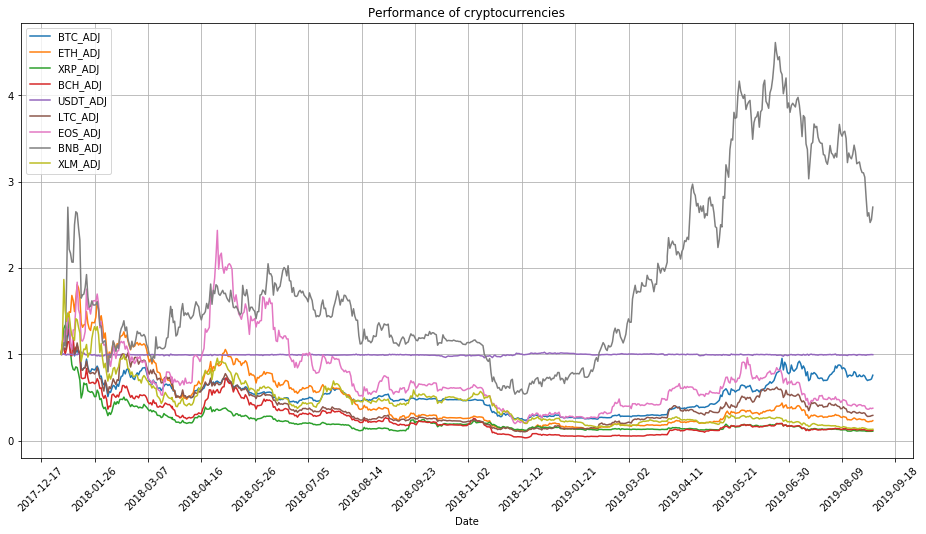

In [3]:
#1.1.2 Normalize prices by first value
norm_prices = data.divide(data.iloc[0])

Norm_assets = ['BTC_ADJ','ETH_ADJ','XRP_ADJ','BCH_ADJ','USDT_ADJ','LTC_ADJ','EOS_ADJ','BNB_ADJ','XLM_ADJ']

plt.figure(figsize=(16,8))
plt.rcParams.update({'font.size':10})
plt.xticks(rotation=45)
ax = plt.axes()
ax.xaxis.set_major_locator(plt.MaxNLocator(20))
plt.plot(norm_prices)
plt.title('Performance of cryptocurrencies')
plt.legend(Norm_assets)
plt.xlabel("Date")
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.grid(True)

plt.show()

we observed that some of the currencies tend to out perform others within the reviewed period, 

Then *we then introduce the percentage change to our data so as to scale them*

In [4]:

#1.1.3 Normalizing the datafrme  
data=pd.DataFrame(data)

def normalize_series(data):
    #take tail to drop head NA
    return data.pct_change(1).dropna()
dt=normalize_series(data)

#remove first row with NAs
dt=dt.tail(len(dt)-1)
dt.columns = [ 'BTC_RET','ETH_RET','XRP_RET','BCH_RET','USDT_RET','LTC_RET','EOS_RET','BNB_RET','XLM_RET']
dt['BTC_RET'].head()

Date
2018-01-03    0.014611
2018-01-04    0.026196
2018-01-05    0.117333
2018-01-06    0.005594
2018-01-07   -0.059873
Name: BTC_RET, dtype: float64

In [5]:
#1.1.4 Normalizing and setting up cumulative returns in a  datafrme 
def normalize_and_accumulate_series(data):
    #take tail to drop head NA
    return data.pct_change(1).cumsum().dropna()
dtc =normalize_and_accumulate_series(data)


#remove first row with NAs
dtc=dtc.tail(len(dtc)-1)
dtc.columns = [ 'BTC_C.RET','ETH_C.RET','XRP_C.RET','BCH_C.RET','USDT_C.RET','LTC_C.RET','EOS_C.RET','BNB_C.RET','XLM_C.RET']
dtc['BTC_C.RET'].head()

Date
2018-01-03    0.111622
2018-01-04    0.137818
2018-01-05    0.255150
2018-01-06    0.260744
2018-01-07    0.200871
Name: BTC_C.RET, dtype: float64

we also examined the Cummulative percentage change for each Crypto-Currency

THE PERCENTAGE CHANGE PLOT

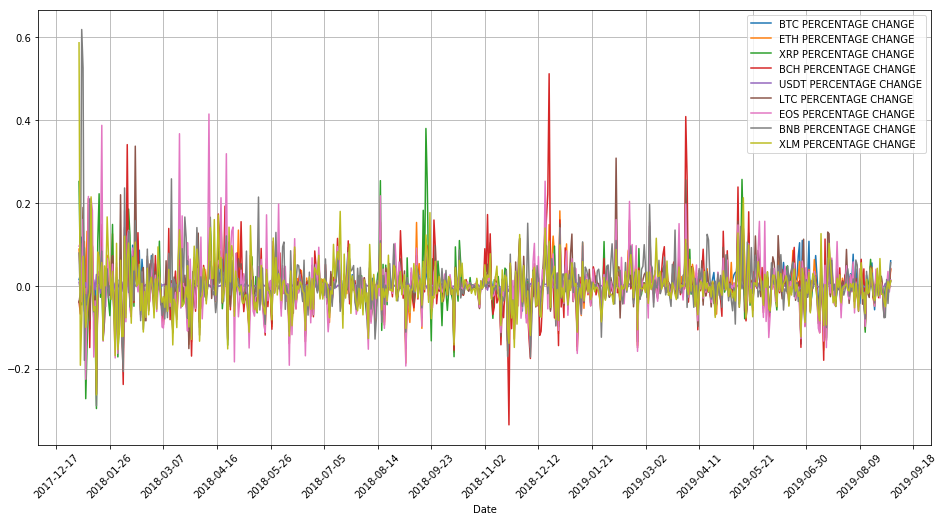

In [6]:
#1.1.5 the Percentage change plot 

plt.figure(figsize=(16,8))
plt.rcParams.update({'font.size':10})
plt.xticks(rotation=45)
ax = plt.axes()
ax.xaxis.set_major_locator(plt.MaxNLocator(20))
plt.plot(dt['BTC_RET'],label='BTC PERCENTAGE CHANGE')
plt.plot(dt['ETH_RET'],label='ETH PERCENTAGE CHANGE')
plt.plot(dt['XRP_RET'],label='XRP PERCENTAGE CHANGE')
plt.plot(dt['BCH_RET'],label='BCH PERCENTAGE CHANGE')
plt.plot(dt['USDT_RET'],label='USDT PERCENTAGE CHANGE')
plt.plot(dt['LTC_RET'],label='LTC PERCENTAGE CHANGE')
plt.plot(dt['EOS_RET'],label='EOS PERCENTAGE CHANGE')
plt.plot(dt['BNB_RET'],label='BNB PERCENTAGE CHANGE')
plt.plot(dt['XLM_RET'],label='XLM PERCENTAGE CHANGE')
plt.xlabel("Date")
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

ax.grid(True)
plt.legend(loc='best')
plt.show()


THE CUMMULATIVE RETURNS PLOT

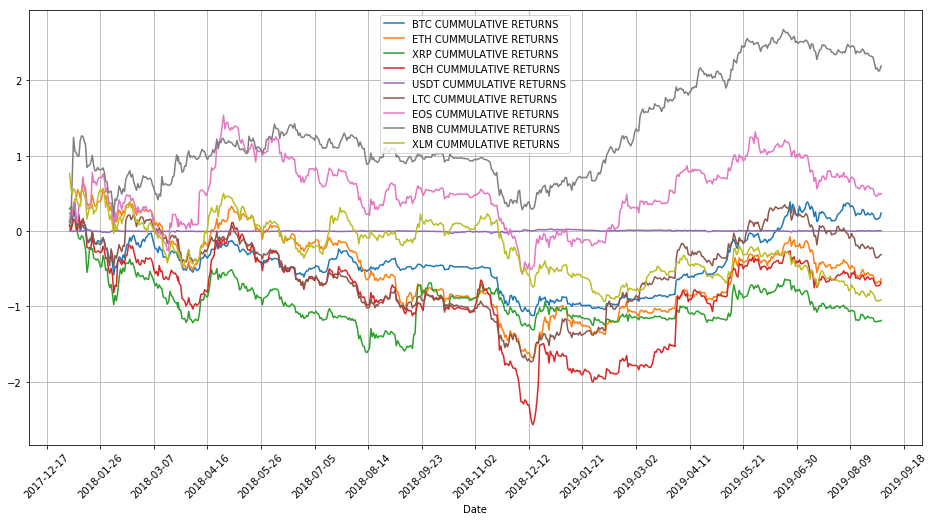

In [7]:
#1.1.6 the Cummulative returns Plot

plt.figure(figsize=(16,8))
plt.rcParams.update({'font.size':10})
plt.xticks(rotation=45)
ax = plt.axes()
ax.xaxis.set_major_locator(plt.MaxNLocator(20))
plt.plot(dtc['BTC_C.RET'],label='BTC CUMMULATIVE RETURNS')
plt.plot(dtc['ETH_C.RET'],label='ETH CUMMULATIVE RETURNS')
plt.plot(dtc['XRP_C.RET'],label='XRP CUMMULATIVE RETURNS')
plt.plot(dtc['BCH_C.RET'],label='BCH CUMMULATIVE RETURNS')
plt.plot(dtc['USDT_C.RET'],label='USDT CUMMULATIVE RETURNS')
plt.plot(dtc['LTC_C.RET'],label='LTC CUMMULATIVE RETURNS')
plt.plot(dtc['EOS_C.RET'],label='EOS CUMMULATIVE RETURNS')
plt.plot(dtc['BNB_C.RET'],label='BNB CUMMULATIVE RETURNS')
plt.plot(dtc['XLM_C.RET'],label='XLM CUMMULATIVE RETURNS')
plt.xlabel("Date")
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.grid(True)
plt.legend(loc='best')
plt.show()

Two major criteria that would determine the desired pair are the correlation value and Cointegration. The pair with the highest correlation, is the desired pair. High positive correlation indicates that the returns of both currencies are trending in same direction. Additionally, the cointegration of the same pair should be significantly low. A value lower than 0.05 is desired

First we attempted to get the p-value of all possible pair in our selected (9- Crypto currency Universe)

In [8]:
#1.1.7 obtaining the P-value for every possible pair within our selected (9- Crypto currency Universe)

for a1 in dt.columns:
    for a2 in dt.columns:
        if a1 != a2:
            test_result = ts.coint(dt[a1], dt[a2])
            print(a1 + ' and ' + a2 + ': p-value = ' + str(test_result[1]))

BTC_RET and ETH_RET: p-value = 0.0
BTC_RET and XRP_RET: p-value = 2.470976042943848e-29
BTC_RET and BCH_RET: p-value = 1.9958557257613114e-24
BTC_RET and USDT_RET: p-value = 1.8460483551336274e-23
BTC_RET and LTC_RET: p-value = 7.855462705098844e-28
BTC_RET and EOS_RET: p-value = 1.0541411510509593e-22
BTC_RET and BNB_RET: p-value = 0.0
BTC_RET and XLM_RET: p-value = 7.646644685099445e-25
ETH_RET and BTC_RET: p-value = 3.1037273760209924e-15
ETH_RET and XRP_RET: p-value = 5.403406373617368e-15
ETH_RET and BCH_RET: p-value = 0.0
ETH_RET and USDT_RET: p-value = 5.551978810760889e-23
ETH_RET and LTC_RET: p-value = 3.5690433450567765e-14
ETH_RET and EOS_RET: p-value = 1.7607283333431284e-24
ETH_RET and BNB_RET: p-value = 1.013739230988736e-14
ETH_RET and XLM_RET: p-value = 9.22239159049706e-23
XRP_RET and BTC_RET: p-value = 2.1092846262888587e-29
XRP_RET and ETH_RET: p-value = 0.0
XRP_RET and BCH_RET: p-value = 0.0
XRP_RET and USDT_RET: p-value = 6.335357767950016e-29
XRP_RET and LTC_RET: 

From the results obtained we saw some very low Cointegration for our Desired Bitcoin Pair. 

**BTC_RET and ETH_RET: p-value = 0.0**

**BTC_RET and XRP_RET: p-value = 2.470976042943848e-29**

**BTC_RET and BCH_RET: p-value = 1.9958557257613114e-24**

**BTC_RET and USDT_RET: p-value = 1.8460483551336274e-23**

**BTC_RET and LTC_RET: p-value = 7.855462705098844e-28**

**BTC_RET and EOS_RET: p-value = 1.0541411510509593e-22**

**BTC_RET and BNB_RET: p-value = 0.0**

BTC/ETH_RET Pair and the BTC/BNB Pair tend to give the lowest P-Values, however since the desired P-value is anything less than 0.05, all of the pairs would be considered to have passed the Cointegration test. Hence we decided to do the correlation test. 

***Correlation is the degree to which the pair tend to move together.***


In [9]:
#1.2.0 Defining Correlation 

def corr(data1,data2):
    #data1 and data2 should be in np arrays#
    mean1=data1.mean()
    mean2=data2.mean()
    std1= data1.std()
    std2= data2.std()
    corr =((data1*data2).mean()-mean1*mean2)/(std1*std2)
    return corr

In [10]:
#1.2.1 Implimenting Correlation on pair 1 

stock_name_1 ='BTC_RET'
stock_name_2='ETH_RET'
score,pvalue,_=coint(dt[stock_name_1],dt[stock_name_2])
correlation = corr(dt[stock_name_1],dt[stock_name_2])
print('correlation between %s and %s is %f'%(stock_name_1, stock_name_2,correlation))
print('Cointegration between %s and %s is %f'%(stock_name_1,stock_name_2,pvalue))

correlation between BTC_RET and ETH_RET is 0.812897
Cointegration between BTC_RET and ETH_RET is 0.000000


In [11]:
#1.2.2 Implimenting Correlation on pair 2 

stock_name_1 ='BTC_RET'
stock_name_2='XRP_RET'
score,pvalue,_=coint(dt[stock_name_1],dt[stock_name_2])
correlation = corr(dt[stock_name_1],dt[stock_name_2])
print('correlation between %s and %s is %f'%(stock_name_1, stock_name_2,correlation))
print('Cointegration between %s and %s is %f'%(stock_name_1,stock_name_2,pvalue))

correlation between BTC_RET and XRP_RET is 0.668008
Cointegration between BTC_RET and XRP_RET is 0.000000


In [12]:
#1.2.3 Implimenting Correlation on pair 3 

stock_name_1 ='BTC_RET'
stock_name_2='BCH_RET'
score,pvalue,_=coint(dt[stock_name_1],dt[stock_name_2])
correlation = corr(dt[stock_name_1],dt[stock_name_2])
print('correlation between %s and %s is %f'%(stock_name_1, stock_name_2,correlation))
print('Cointegration between %s and %s is %f'%(stock_name_1,stock_name_2,pvalue))

correlation between BTC_RET and BCH_RET is 0.760414
Cointegration between BTC_RET and BCH_RET is 0.000000


In [13]:
#1.2.4 Implimenting Correlation on pair 4 

stock_name_1 ='BTC_RET'
stock_name_2='USDT_RET'
score,pvalue,_=coint(dt[stock_name_1],dt[stock_name_2])
correlation = corr(dt[stock_name_1],dt[stock_name_2])
print('correlation between %s and %s is %f'%(stock_name_1, stock_name_2,correlation))
print('Cointegration between %s and %s is %f'%(stock_name_1,stock_name_2,pvalue))

correlation between BTC_RET and USDT_RET is 0.171753
Cointegration between BTC_RET and USDT_RET is 0.000000


In [14]:
#1.2.5 Implimenting Correlation on pair 5 

stock_name_1 ='BTC_RET'
stock_name_2='LTC_RET'
score,pvalue,_=coint(dt[stock_name_1],dt[stock_name_2])
correlation = corr(dt[stock_name_1],dt[stock_name_2])
print('correlation between %s and %s is %f'%(stock_name_1, stock_name_2,correlation))
print('Cointegration between %s and %s is %f'%(stock_name_1,stock_name_2,pvalue))

correlation between BTC_RET and LTC_RET is 0.785515
Cointegration between BTC_RET and LTC_RET is 0.000000


In [15]:
#1.2.6 Implimenting Correlation on pair 6 

stock_name_1 ='BTC_RET'
stock_name_2='EOS_RET'
score,pvalue,_=coint(dt[stock_name_1],dt[stock_name_2])
correlation = corr(dt[stock_name_1],dt[stock_name_2])
print('correlation between %s and %s is %f'%(stock_name_1, stock_name_2,correlation))
print('Cointegration between %s and %s is %f'%(stock_name_1,stock_name_2,pvalue))

correlation between BTC_RET and EOS_RET is 0.691426
Cointegration between BTC_RET and EOS_RET is 0.000000


In [16]:
#1.2.7 Implimenting Correlation on pair 7 

stock_name_1 ='BTC_RET'
stock_name_2='BNB_RET'
score,pvalue,_=coint(dt[stock_name_1],dt[stock_name_2])
correlation = corr(dt[stock_name_1],dt[stock_name_2])
print('correlation between %s and %s is %f'%(stock_name_1, stock_name_2,correlation))
print('Cointegration between %s and %s is %f'%(stock_name_1,stock_name_2,pvalue))

correlation between BTC_RET and BNB_RET is 0.583208
Cointegration between BTC_RET and BNB_RET is 0.000000


In [17]:
#1.2.8 Implimenting Correlation on pair 8 

stock_name_1 ='BTC_RET'
stock_name_2='XLM_RET'
score,pvalue,_=coint(dt[stock_name_1],dt[stock_name_2])
correlation = corr(dt[stock_name_1],dt[stock_name_2])
print('correlation between %s and %s is %f'%(stock_name_1, stock_name_2,correlation))
print('Cointegration between %s and %s is %f'%(stock_name_1,stock_name_2,pvalue))

correlation between BTC_RET and XLM_RET is 0.652851
Cointegration between BTC_RET and XLM_RET is 0.000000


In [18]:
#1.3.0 Defining Correlation Matrix 
corrMatrix = dt.corr()
dt.corr()



,BTC_RET,ETH_RET,XRP_RET,BCH_RET,USDT_RET,LTC_RET,EOS_RET,BNB_RET,XLM_RET
BTC_RET,1.000000,0.814236,0.669108,0.761667,0.172036,0.786809,0.692565,0.584168,0.653926
ETH_RET,0.814236,1.000000,0.752217,0.757754,0.102126,0.813990,0.739462,0.558828,0.709704
XRP_RET,0.669108,0.752217,1.000000,0.625250,0.023811,0.681097,0.677222,0.457743,0.746580
BCH_RET,0.761667,0.757754,0.625250,1.000000,0.091932,0.753983,0.671952,0.483499,0.597043
USDT_RET,0.172036,0.102126,0.023811,0.091932,1.000000,0.104917,0.040406,0.088874,0.126620
LTC_RET,0.786809,0.813990,0.681097,0.753983,0.104917,1.000000,0.719158,0.587999,0.630879
EOS_RET,0.692565,0.739462,0.677222,0.671952,0.040406,0.719158,1.000000,0.508352,0.636812
BNB_RET,0.584168,0.558828,0.457743,0.483499,0.088874,0.587999,0.508352,1.000000,0.473120
XLM_RET,0.653926,0.709704,0.746580,0.597043,0.126620,0.630879,0.636812,0.473120,1.000000


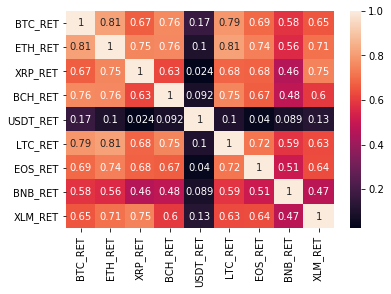

In [19]:
#1.3.1 Correlation Matrix Heat map

sn.heatmap(corrMatrix, annot=True)

*CRYPTOCURRENCY PAIR SELECTED *

From the analysis and the values gotten we can see that although pairs all seen to have very low Cointegration value, but we observed that the Ethereum (ETH) had the best correlation value (81.2%). Thus we will be proceeding with the Bitcoin/Ethereum pair for the next two phases; Price forecasting and developing trade strategy

### PROJECT :CRYPTOCURRENCY TRADING-PAIR FORECASTING, USING MACHINE LEARNING AND DEEP LEARNING TECHNIQUE. ###



**2. FORECAST ADJUSTED PRICE FOR SELECTED PAIR**

we will now save our data for Bitcoin(BTC) and Ethereum (ETH) as csv files 

In [20]:
#2.1.0 saving and reading our Selected Cryptocurrencies 

BTC.to_csv(r'.\BTC.csv',index='Date')
btc = pd.read_csv("./BTC.csv")

ETH.to_csv(r'.\ETH.csv',index='Date')
eth = pd.read_csv("./ETH.csv")


btc.head()



,Date,High,Low,Open,Close,Volume,Adj Close
0,2018-01-01,14112.200195,13154.700195,14112.200195,13657.200195,10291200000,13657.200195
1,2018-01-02,15444.599609,13163.599609,13625.000000,14982.099609,16846600192,14982.099609
2,2018-01-03,15572.799805,14844.500000,14978.200195,15201.000000,16871900160,15201.000000
3,2018-01-04,15739.700195,14522.200195,15270.700195,15599.200195,21783199744,15599.200195
4,2018-01-05,17705.199219,15202.799805,15477.200195,17429.500000,23840899072,17429.500000


In [21]:
#2.1.1 calling data  ethereum  
eth.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2018-01-01,782.530029,742.004028,755.757019,772.640991,2595760128,772.640991
1,2018-01-02,914.830017,772.346008,772.346008,884.443970,5783349760,884.443970
2,2018-01-03,974.471008,868.450989,886.000000,962.719971,5093159936,962.719971
3,2018-01-04,1045.079956,946.085999,961.713013,980.921997,6502859776,980.921997
4,2018-01-05,1075.390015,956.325012,975.750000,997.719971,6683149824,997.719971


In [22]:
btc.shape

(610, 7)

In [23]:
eth.shape

(610, 7)

*find the extract the data from each of the csv files*

Concatenating the adjusted Close for the  currencies

In [24]:
#2.2,0 Concatenating the adjusted Close for the currencies

df4= pd.concat([btc['Date'],btc['Adj Close']], ignore_index=False,axis=1)
df4= pd.concat([df4,eth['Adj Close']], ignore_index=False,axis=1)


#check for NAs
df4= df4.dropna(axis=1,how='any')

#simplify column names
df4.columns = [ 'Date', 'btc', 'eth' ]

df4.head()

,Date,btc,eth
0,2018-01-01,13657.200195,772.640991
1,2018-01-02,14982.099609,884.443970
2,2018-01-03,15201.000000,962.719971
3,2018-01-04,15599.200195,980.921997
4,2018-01-05,17429.500000,997.719971


In [25]:
#2.2.1, indexing  Concatenated data

BTC_AdjClosing=btc['Adj Close']
BTC_AdjClosing = pd.DataFrame(btc['Adj Close']) 
BTC_AdjClosing.rename(columns = {'Adj Close':'BTC_AdjClosing'}, inplace = True) 

ETH_AdjClosing=eth['Adj Close']
ETH_AdjClosing = pd.DataFrame(eth['Adj Close']) 
ETH_AdjClosing.rename(columns = {'Adj Close':'ETH_AdjClosing'}, inplace = True) 
ETH_AdjClosing.head()


Crypto_pair= pd.concat([BTC_AdjClosing,ETH_AdjClosing], ignore_index=False,axis=1)

Crypto_pair['Date'] = pd.to_datetime(btc['Date'],format='%Y-%m-%d')
Crypto_pair.index = btc['Date']

Crypto_pair.head()



,BTC_AdjClosing,ETH_AdjClosing,Date
Date,,,
2018-01-01,13657.200195,772.640991,2018-01-01
2018-01-02,14982.099609,884.443970,2018-01-02
2018-01-03,15201.000000,962.719971,2018-01-03
2018-01-04,15599.200195,980.921997,2018-01-04
2018-01-05,17429.500000,997.719971,2018-01-05


In [26]:
Crypto_pair.shape

(610, 3)

C:\Users\DELL PC\Anaconda3\anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


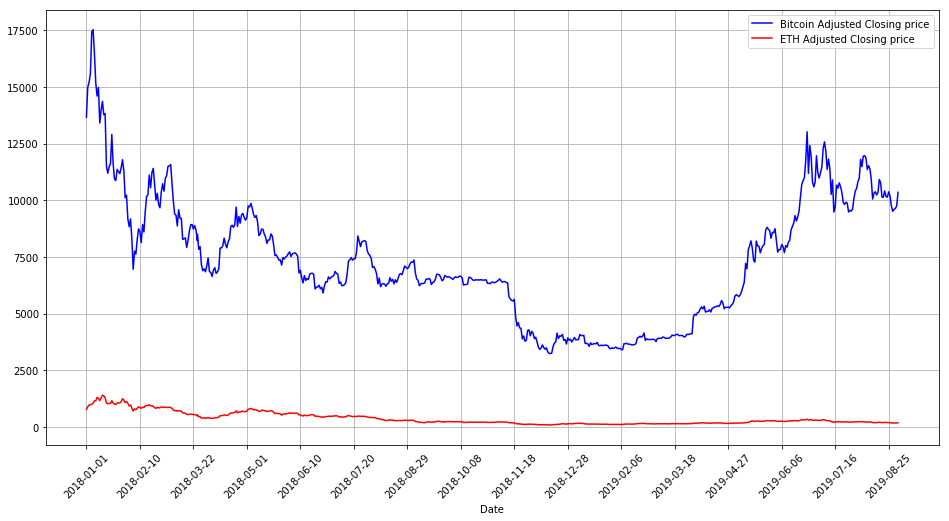

In [27]:
#2.2.3 The Adjusted Closing plot for Bitcoin and Ethereum

plt.figure(figsize=(16,8))
plt.rcParams.update({'font.size':10})
plt.xticks(rotation=45)
ax = plt.axes()
ax.xaxis.set_major_locator(plt.MaxNLocator(20))
plt.plot(Crypto_pair['BTC_AdjClosing'],color='blue',  label='Bitcoin Adjusted Closing price')
plt.plot(Crypto_pair['ETH_AdjClosing'],color='red',  label='ETH Adjusted Closing price')
plt.xlabel("Date")

ax.grid(True)
plt.legend(loc='best')
plt.show()



Now lets consider the graphical representation for the returns for both BTC and ETH

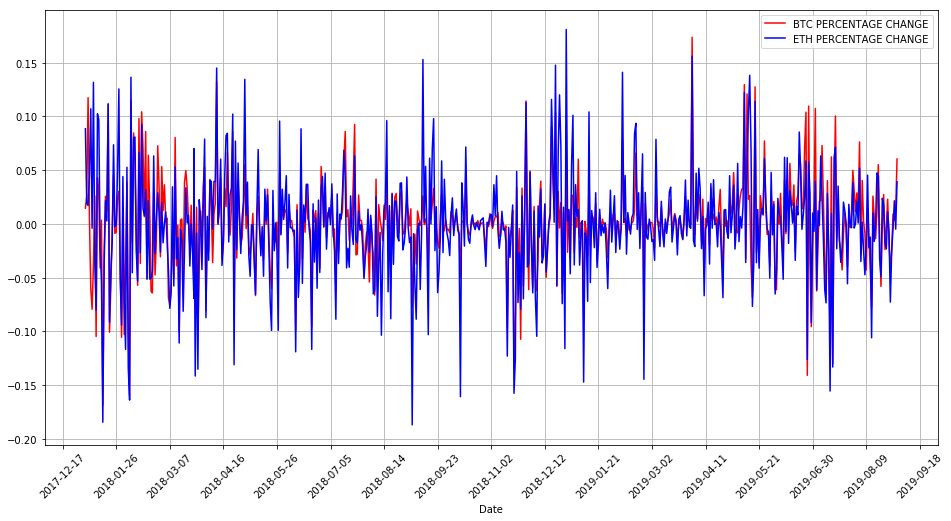

In [28]:
##2.2.4 graphical representation for the returns for both BTC and ETH

plt.figure(figsize=(16,8))
plt.rcParams.update({'font.size':10})
plt.xticks(rotation=45)
ax = plt.axes()
ax.xaxis.set_major_locator(plt.MaxNLocator(20))
plt.plot(dt['BTC_RET'],color='red',label='BTC PERCENTAGE CHANGE')
plt.plot(dt['ETH_RET'],color='blue',label='ETH PERCENTAGE CHANGE')
plt.xlabel("Date")
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.grid(True)
plt.legend(loc='best')
plt.show()

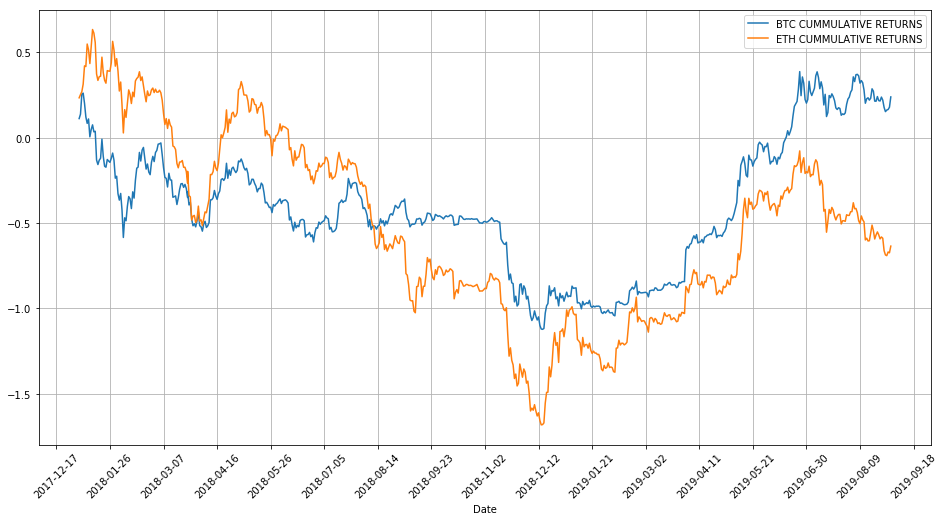

In [29]:
#2.2.5 THE CUMMULATIVE RETURNS PLOT  FOR BTC AND ETH

plt.figure(figsize=(16,8))
plt.rcParams.update({'font.size':10})
plt.xticks(rotation=45)
ax = plt.axes()
ax.xaxis.set_major_locator(plt.MaxNLocator(20))
plt.plot(dtc['BTC_C.RET'],label='BTC CUMMULATIVE RETURNS')
plt.plot(dtc['ETH_C.RET'],label='ETH CUMMULATIVE RETURNS')
plt.xlabel("Date")
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.grid(True)
plt.legend(loc='best')
plt.show()

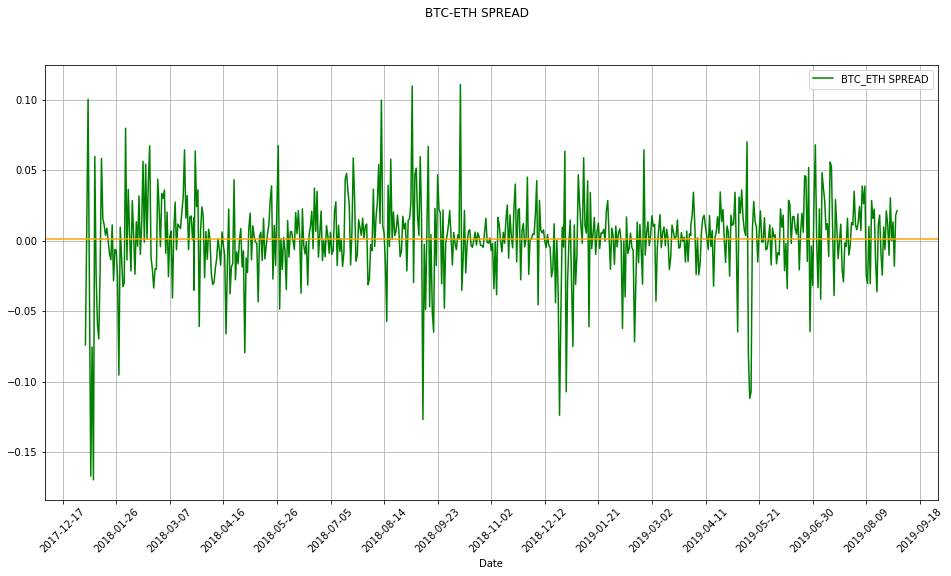

In [30]:
#2.3.0 Pairs Spread 
# 2.3.1. BTC-ETH Spread Calculation
BTC_ETH = dt['BTC_RET'] - dt['ETH_RET']

plt.figure(figsize=(16,8))
plt.rcParams.update({'font.size':10})
plt.xticks(rotation=45)
ax = plt.axes()
ax.xaxis.set_major_locator(plt.MaxNLocator(20))
plt.plot(BTC_ETH,color='green',label='BTC_ETH SPREAD')
plt.suptitle('BTC-ETH SPREAD')
ax.axhline(BTC_ETH.mean(), color='orange')
ax.grid(True)
plt.xlabel("Date")
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.legend(loc='best')
plt.show()





*LET'S ATTEMPT TO PREDICT THE ADJUSTED PRICE FOR THE BASE CURRENCY - BITCOIN*
*we will get the best best forecast model for the currency and then procceed to the spread*

In [31]:
BTC_AdjClosing.index = btc['Date']

In [32]:
# 2.3.2  split into train and validation/testing
BTC_train =BTC_AdjClosing[:488]
BTC_test = BTC_AdjClosing[488:]

In [33]:
print('\n Shape of training set:')
print(BTC_train.shape)
print('\n Shape of test set:')
print(BTC_test.shape)


 Shape of training set:
(488, 1)

 Shape of test set:
(122, 1)


In [34]:
BTC_train.head()

,BTC_AdjClosing
Date,
2018-01-01,13657.200195
2018-01-02,14982.099609
2018-01-03,15201.000000
2018-01-04,15599.200195
2018-01-05,17429.500000


In [35]:

BTC_AdjClosing.head()

,BTC_AdjClosing
Date,
2018-01-01,13657.200195
2018-01-02,14982.099609
2018-01-03,15201.000000
2018-01-04,15599.200195
2018-01-05,17429.500000


Commonly, an analyst may use various predictive tools in other to predict or forecast the trend of price movement. For this assignment we will be using the Long Short-Term Memory model (LSTM), the Moving Average as well as the ARIMA (Auto Regressive Integrated Moving Average). 

## Long Short Term Memory (LSTM) ##
LSTMs (“long short-term memory” units) is one of the most remarkable Recurrent neural networks. The LSTM is designed to identify data sequence patterns. Long Short-Term Memory networks are the best quality level to building RNN.  and they have demonstrated to be exceptionally powerful for succession forecast problems. By training the models via back-propagation, the LSTM stores useful data while forgetting any that is deemed otherwise.  Examples of such data that can be forecasted via LSTM are stock markets, sensors, genomes, words and handwriting.


In [36]:
np.random.seed(0)
# 2.4.0 converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(BTC_AdjClosing)



In [37]:
# 2.4.1 setting training and testing range

x_train, y_train = [], []
for i in range(80,len(BTC_train)):
    x_train.append(scaled_data[i-80:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

x_train.shape



(408, 80, 1)

In [38]:
# 2.4.2 create and fit the LSTM network

model = Sequential()
model.add(LSTM(units=13, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=3))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam',metrics=['accuracy'])
model.fit(x_train, y_train, epochs=13, batch_size=1, verbose=2)



Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/13
 - 37s - loss: 0.0047 - acc: 0.0025
Epoch 2/13
 - 34s - loss: 0.0017 - acc: 0.0025
Epoch 3/13
 - 34s - loss: 0.0015 - acc: 0.0025
Epoch 4/13
 - 34s - loss: 0.0011 - acc: 0.0025
Epoch 5/13
 - 34s - loss: 9.9933e-04 - acc: 0.0025
Epoch 6/13
 - 34s - loss: 8.1033e-04 - acc: 0.0025
Epoch 7/13
 - 34s - loss: 7.8824e-04 - acc: 0.0025
Epoch 8/13
 - 34s - loss: 6.7112e-04 - acc: 0.0025
Epoch 9/13
 - 34s - loss: 5.6545e-04 - acc: 0.0025
Epoch 10/13
 - 34s - loss: 5.4926e-04 - acc: 0.0025
Epoch 11/13
 - 34s - loss: 5.0064e-04 - acc: 0.0025
Epoch 12/13
 - 34s - loss: 4.3936e-04 - acc: 0.0025
Epoch 13/13
 - 34s - loss: 4.6040e-04 - acc: 0.0025


In [39]:
# 2.4.3  predicting 122 values, using past 80 from the train data
inputs = BTC_AdjClosing[len(BTC_AdjClosing) - len(BTC_test) - 80:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)


In [40]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 80, 13)            780       
_________________________________________________________________
lstm_2 (LSTM)                (None, 3)                 204       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 4         
Total params: 988
Trainable params: 988
Non-trainable params: 0
_________________________________________________________________
None


In [41]:
# 2.4.4 setting the traning and testing range for the LSTM 
X_test = []
for i in range(80,inputs.shape[0]):
    X_test.append(inputs[i-80:i,0])
X_test = np.array(X_test)
print(X_test.shape)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_priceL = model.predict(X_test)
closing_priceL = scaler.inverse_transform(closing_priceL)

(122, 80)


In [42]:
# 2.4.5 RMSE for the LSTM 
rms=np.sqrt(np.mean(np.power((BTC_test['BTC_AdjClosing'].values-closing_priceL),2)))
rms

2323.032920883197

In [43]:
# 2.4.6 MAPE for the LSTM 
mape = np.mean(np.abs(closing_priceL - BTC_test['BTC_AdjClosing'].values)/np.abs(BTC_test['BTC_AdjClosing'].values))
mape

0.20459902303347718

In [44]:
# 2.4.7 MPE for the LSTM 
mpe = np.mean((closing_priceL - BTC_test['BTC_AdjClosing'].values)/BTC_test['BTC_AdjClosing'].values)
mpe

0.011401950037542763

C:\Users\DELL PC\Anaconda3\anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
C:\Users\DELL PC\Anaconda3\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


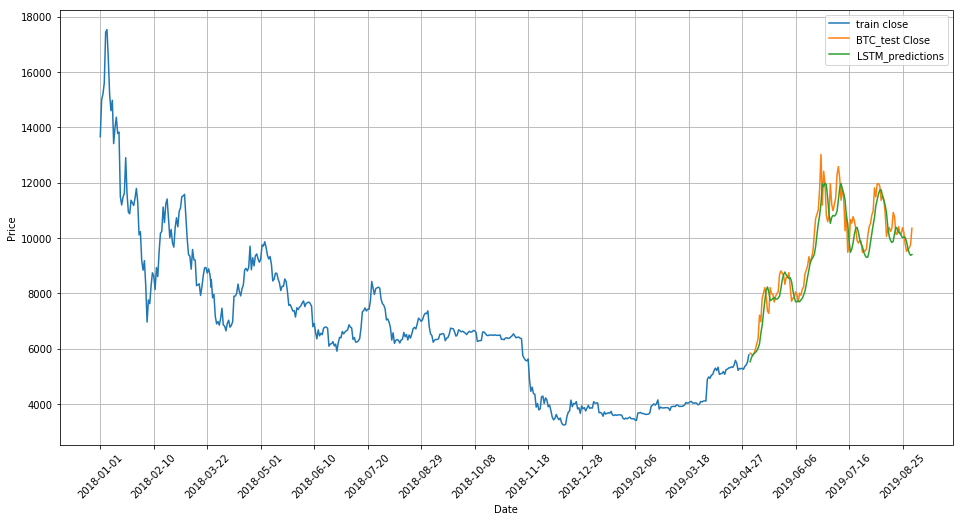

In [45]:
# 2.4.8 LSTM Forecast Plot

plt.figure(figsize=(16,8))
plt.rcParams.update({'font.size':10})
plt.xticks(rotation=45)
ax = plt.axes()
ax.xaxis.set_major_locator(plt.MaxNLocator(20))
BTC_test['LSTM_Predictions'] = closing_priceL
plt.plot(BTC_train['BTC_AdjClosing'],label='train close')
plt.plot(BTC_test['BTC_AdjClosing'],label='BTC_test Close')
plt.plot(BTC_test['LSTM_Predictions'],label='LSTM_predictions')
plt.xlabel("Date")

plt.ylabel("Price") 
ax.grid(True)
plt.legend(loc='best')
plt.show()


In [46]:
# 2.4.9 Correlation between the predicted via LSTM and the actual 
corr_LSTM = np.corrcoef(BTC_test['LSTM_Predictions'].dropna().values, BTC_test['BTC_AdjClosing'].dropna().values)[0,1] 

print('correlation between %s and %s is %f'%('test_BTC_AdjClosing', 'LSTM_Predictions',corr_LSTM))

correlation between test_BTC_AdjClosing and LSTM_Predictions is 0.948012


### IMPLICATION ###
*The LSTM model has the following results:*
    
RMS = 2323.0302070760094
MAPE = 0.2045987551428502
MPE = 0.011401705487805586
Correlation = 94.8%
We will investigate the other models to see if we can get a better result 



For the next two models we have to investigate the ACF and the PACF of the returns and the square of the returns of our time series data. ACF stands for Auto Correlation function and PACF stands for Partial Auto correlation function.  both are meant to measure the level of correlation or similarity of a particular time series with a previous time. This often helps us determine the most relevant part of the Moving-Average and ARIMA model

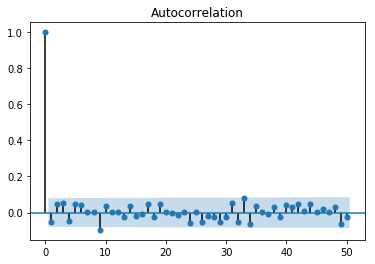

In [47]:
# 2.5.0.1 ACF for Bitcoin returns 

plot_acf(dt['BTC_RET'], lags=50)
pyplot.show()


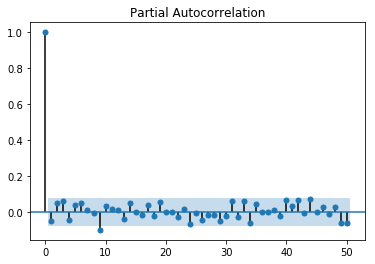

In [48]:
# 2.5.0.2 PACF for Bitcoin returns 

plot_pacf(dt['BTC_RET'], lags=50)
pyplot.show()

In [49]:
# 2.5.0.3 lets square the returns and try the ACF and PACF plots again 
BTC_RET_SQ=(dt['BTC_RET'])**2
BTC_RET_SQ.head()

Date
2018-01-03    0.000213
2018-01-04    0.000686
2018-01-05    0.013767
2018-01-06    0.000031
2018-01-07    0.003585
Name: BTC_RET, dtype: float64

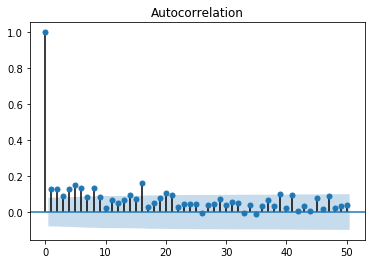

In [50]:
# 2.5.0.4  ACF for Bitcoin returns squared 
plot_acf(BTC_RET_SQ, lags=50)
pyplot.show()

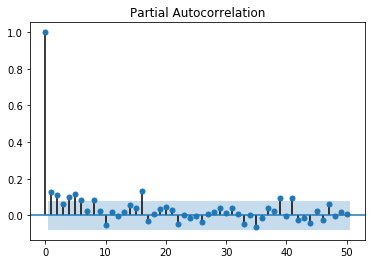

In [51]:
# 2.5.0.5  PACF for Bitcoin returns squared 
plot_pacf(BTC_RET_SQ, lags=50)
pyplot.show()

However, ACF and the PACF suggests an AR model. 

### MOVING AVERAGE ###
**In budgetary applications, a Moving Average is the unweighted mean of the past n data. In any case, in other applications, the mean is typically taken from an equivalent number of information on either side of a focal worth. This guarantees variations in the mean are lined up with the variations in the information as opposed to being moved in time.**

In [52]:
# 2.6.0 moving average model 

preds = []
for i in range(0,BTC_test.shape[0]):
    a = BTC_train['BTC_AdjClosing'][len(BTC_train)-122+i:].sum() + sum(preds)
    b = a/122
    preds.append(b)

In [53]:
# 2.6.1 RMSE for moving average model

rms=np.sqrt(np.mean(np.power((np.array(BTC_test['BTC_AdjClosing'])-preds),2)))
print('\n RMSE value on validation set:')
print(rms)


 RMSE value on validation set:
5408.400905373845


In [54]:
# 2.6.2 MAPE for moving average model

mape=np.mean(np.abs(preds - BTC_test['BTC_AdjClosing'].values)/np.abs(BTC_test['BTC_AdjClosing'].values))
mape

0.525507061227389

In [55]:
# 2.6.3 MPE for moving average model

mpe = np.mean((preds - BTC_test['BTC_AdjClosing'].values)/BTC_test['BTC_AdjClosing'].values)
mpe

-0.525507061227389

C:\Users\DELL PC\Anaconda3\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\DELL PC\Anaconda3\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


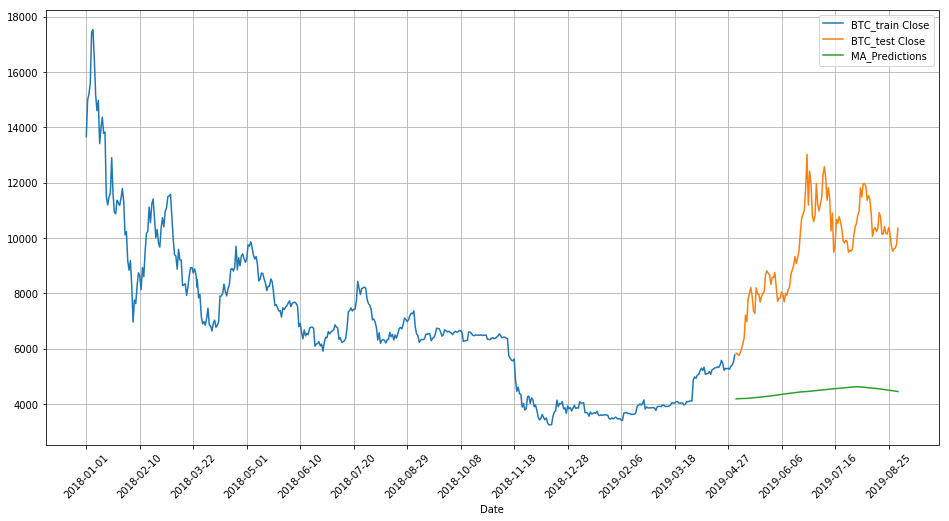

In [56]:
#2.6.4   moving average model Forecast plot

plt.figure(figsize=(16,8))
plt.rcParams.update({'font.size':10})
plt.xticks(rotation=45)
ax = plt.axes()
ax.xaxis.set_major_locator(plt.MaxNLocator(20))
BTC_test['MA_Predictions'] = 0
BTC_test['MA_Predictions'] = preds
plt.plot(BTC_train['BTC_AdjClosing'],label='BTC_train Close')
plt.plot(BTC_test['BTC_AdjClosing'],label='BTC_test Close')
plt.plot(BTC_test['MA_Predictions'],label='MA_Predictions')
plt.xlabel("Date")

ax.grid(True)
plt.legend(loc='best')
plt.show()

In [57]:
#2.6.4  Correlation between the predicted via Moving Average and the actual  

corr_MA = np.corrcoef(BTC_test['MA_Predictions'].dropna().values, BTC_test['BTC_AdjClosing'].dropna().values)[0,1] 

print('correlation between %s and %s is %f'%('test_BTC_AdjClosing', 'Moving_Average',corr_MA))

correlation between test_BTC_AdjClosing and Moving_Average is 0.816826


### IMPLICATION ###
The Moving Average model has the following results: 


RMS = 5408.400905373845

MAPE = 0.525507061227389

MPE = -0.525507061227389

Correlation = 81.7%

Evidently the LSTM has a better result than that of the Moving Average   We will investigate the other models to see if we can get a better result 


### ARIMA##

*"ARIMA: AutoRegressive Integrated Moving Average. It is a class of model that gets a collection of different standard progressive structures in data (within a particular time series)."*
**Source:https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/ How to Create an ARIMA Model for Time Series Forecasting in Python
by Jason Brownlee**

*ARIMA is an incredibly common genuine methodology for time series analysis. ARIMA models studies the past characteristics to envision the future characteristics. There are three critical parameters in ARIMA:* 

*p (past qualities utilized for forecasting the following worth)*

*q (past gauge mistakes used to anticipate the future qualities)* 

*d (differencing order)* 

Parameter tuning for ARIMA consumes a huge amount of time. So we will use auto ARIMA which thus picks the best mix of (p,q,d) that gives the least error*


In [58]:
#2.7.0 ARIMA Model set up 
B_model = auto_arima(BTC_train, start_p=0, start_q=0,max_p=3, max_q=3, m=12,start_P=0, seasonal=True,d=1, D=1, trace=True,error_action='ignore',suppress_warnings=True)
B_model.fit(BTC_train)

Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 1, 12); AIC=6938.480, BIC=6950.970, Fit time=1.738 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=7217.188, BIC=7225.514, Fit time=0.045 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=7089.437, BIC=7106.091, Fit time=1.446 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=6939.785, BIC=6956.438, Fit time=3.070 seconds
Near non-invertible roots for order (0, 1, 1)(0, 1, 1, 12); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=7215.188, BIC=7219.352, Fit time=0.030 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 1, 1, 12); AIC=6936.823, BIC=6953.476, Fit time=2.396 seconds
Near non-invertible roots for order (0, 1, 0)(1, 1, 1, 12); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.995)
Fit ARIMA: order=(0, 1, 0) seasona

ARIMA(maxiter=50, method='lbfgs', order=(0, 1, 0), out_of_sample_size=0,
   scoring='mse', scoring_args=None, seasonal_order=(1, 1, 1, 12),
   start_params=None, suppress_warnings=True, trend=None,
   with_intercept=True)

In [59]:
print(B_model.summary())

                                 Statespace Model Results                                 
Dep. Variable:                                  y   No. Observations:                  488
Model:             SARIMAX(0, 1, 0)x(1, 1, 1, 12)   Log Likelihood               -3464.411
Date:                            Tue, 17 Mar 2020   AIC                           6936.823
Time:                                    19:49:13   BIC                           6953.476
Sample:                                         0   HQIC                          6943.372
                                            - 488                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.6581      3.034      0.546      0.585      -4.289       7.605
ar.S.L12      -0.0870      0.027   

In [60]:
#2.7.1 getting the ARIMA Model forecast prediction

forecast = B_model.predict(n_periods=122)
forecast = pd.DataFrame(forecast,index = BTC_test.index,columns=['Prediction'])

In [61]:
#2.7.2 MAPE for the  ARIMA Model forecast 
mape = np.mean(np.abs(forecast['Prediction'] - BTC_test['BTC_AdjClosing'])/np.abs(BTC_test['BTC_AdjClosing']))
mape

0.24349402824882596

In [62]:
#2.7.3 RMSE for the  ARIMA Model forecast 

rms=np.sqrt(np.mean(np.power((np.array(BTC_test['BTC_AdjClosing'])-np.array(forecast['Prediction'])),2)))
rms



2764.4071389640226

In [63]:
#2.7.4 MPE for the  ARIMA Model forecast 

mpe = np.mean((forecast['Prediction'].dropna().values  - BTC_test['BTC_AdjClosing'].dropna().values)/BTC_test['BTC_AdjClosing'].dropna().values)
mpe

-0.24349402824882593

C:\Users\DELL PC\Anaconda3\anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


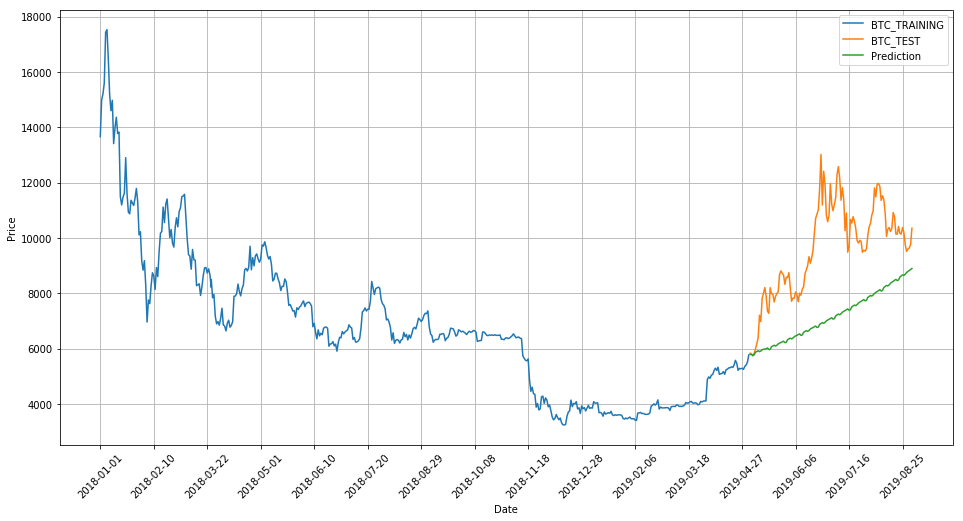

In [64]:
#2.7.5   ARIMA Model Forecast plot
plt.figure(figsize=(16,8))
plt.rcParams.update({'font.size':10})
plt.xticks(rotation=45)
ax = plt.axes()
ax.xaxis.set_major_locator(plt.MaxNLocator(20))
plt.plot(BTC_train['BTC_AdjClosing'],label='BTC_TRAINING')
plt.plot(BTC_test['BTC_AdjClosing'],label='BTC_TEST')
plt.plot(forecast['Prediction'])
plt.xlabel("Date")
 
plt.ylabel("Price") 
ax.grid(True)
plt.legend(loc='best')
plt.show()

In [65]:
#2.7.6  Correlation between the predicted via ARIMA and the actual 

corr_ARIMA = np.corrcoef(forecast['Prediction'].dropna().values, BTC_test['BTC_AdjClosing'].dropna().values)[0,1] 

print('correlation between %s and %s is %f'%('test_BTC_AdjClosing', 'ARIMA_Predictions',corr_ARIMA))

correlation between test_BTC_AdjClosing and ARIMA_Predictions is 0.657145


## IMPLICATION ##
*The ARIMA model has the following results:*
    
*RMS = 2914.339206649189*

*MAPE = 0.25884675669532237*

*MPE = -0.2587916064701649*

*Correlation = 65.8%


*Considering the previous results, we need to still investigate more as none has given a result better than the LSTM yet. 
Evidently the LSTM has a better result than that of the ARIMA, We will investigate the other model to see if we can get a better result* 



### The Artificial Neural Network ###

*Artificial Neural Network is a data handling model which is utilized to contemplate the conduct of an intricate framework by computer replication. It is incited by the organic method which the human mind processes its data. The key component of the model is the novel structure of the data preparing framework. The objective of artificial neural network is to analyze information in a similarly manner a human mind would*

**Artificial Neural Networks (ANN's) utilize three neuron layers these are:**

*1.	input layer,* 

*2.	hidden or concealed layer, and*

*3.	the Output or yield layers.*


*These help to get the anticipated forecasts. The artificial nodes are the fundamentally prepared components of artificial neural network*


In [66]:
#2.8.0 setting the training and testing range for the ANN model

np.random.seed(0)
x_trainB, y_trainB = [], []
for i in range(80,len(BTC_train)):
    x_trainB.append(scaled_data[i-80:i,0])
    y_trainB.append(scaled_data[i,0])
x_trainB, y_trainB = np.array(x_trainB), np.array(y_trainB)

x_trainB = np.reshape(x_trainB, (x_trainB.shape[0],x_trainB.shape[1]))


In [67]:
x_trainB.shape



(408, 80)

In [68]:
#2.8.1 setting the ANN model

modelB = Sequential()
modelB.add(Dense(units = 13, kernel_initializer = 'uniform', activation = 'relu', input_dim = 80))
np.random.seed(0)
modelB.add(Dense(units =13, kernel_initializer = 'uniform', activation      = 'relu'))
modelB.add(Dense(units = 1, kernel_initializer = 'uniform', activation        = 'sigmoid'))
modelB.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics 
         = ['accuracy'])
modelB.fit(x_trainB, y_trainB, batch_size = 1, epochs = 13,verbose=2)

Epoch 1/13
 - 1s - loss: 0.0527 - acc: 0.0025
Epoch 2/13
 - 0s - loss: 0.0246 - acc: 0.0025
Epoch 3/13
 - 0s - loss: 0.0068 - acc: 0.0025
Epoch 4/13
 - 0s - loss: 0.0037 - acc: 0.0025
Epoch 5/13
 - 0s - loss: 0.0027 - acc: 0.0025
Epoch 6/13
 - 0s - loss: 0.0020 - acc: 0.0025
Epoch 7/13
 - 0s - loss: 0.0017 - acc: 0.0025
Epoch 8/13
 - 0s - loss: 0.0013 - acc: 0.0025
Epoch 9/13
 - 0s - loss: 0.0010 - acc: 0.0025
Epoch 10/13
 - 0s - loss: 9.0119e-04 - acc: 0.0025
Epoch 11/13
 - 0s - loss: 7.7855e-04 - acc: 0.0025
Epoch 12/13
 - 0s - loss: 7.3021e-04 - acc: 0.0025
Epoch 13/13
 - 0s - loss: 6.1027e-04 - acc: 0.0025


In [69]:
print(modelB.summary())



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 13)                1053      
_________________________________________________________________
dense_3 (Dense)              (None, 13)                182       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 14        
Total params: 1,249
Trainable params: 1,249
Non-trainable params: 0
_________________________________________________________________
None


In [70]:
#2.8.2 predicting 122 values, using past 80 from the train data
inputsB = BTC_AdjClosing[len(BTC_AdjClosing) - len(BTC_test) - 80:].values
inputsB = inputsB.reshape(-1,1)
inputsB  = scaler.transform(inputsB)



In [71]:
#2.8.3 setting the ANN outcome range and size

X_testB = []
for i in range(80,inputsB.shape[0]):
    X_testB.append(inputsB[i-80:i,0])
X_testB = np.array(X_testB)
print(X_testB.shape)
X_testB = np.reshape(X_testB, (X_testB.shape[0],X_testB.shape[1]))
X_testB.shape
closing_priceB = modelB.predict(X_testB)
closing_priceB = scaler.inverse_transform(closing_priceB)



(122, 80)


In [72]:
#2.8.4 the RMSE for the ANN model

RMS=np.sqrt(np.mean(np.power((BTC_test['BTC_AdjClosing'].values-closing_priceB),2)))
RMS



2280.2848657256177

In [73]:
#2.8.5 the MAPE for the ANN model

MAPE = np.mean(np.abs(closing_priceB - BTC_test['BTC_AdjClosing'].values)/np.abs(BTC_test['BTC_AdjClosing'].values))
MAPE



0.19184192572123937

In [74]:
#2.8.6 the MPE for the ANN model

MPE = np.mean((closing_priceB - BTC_test['BTC_AdjClosing'].values)/BTC_test['BTC_AdjClosing'].values)
MPE



-0.09922290274562506

C:\Users\DELL PC\Anaconda3\anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
C:\Users\DELL PC\Anaconda3\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


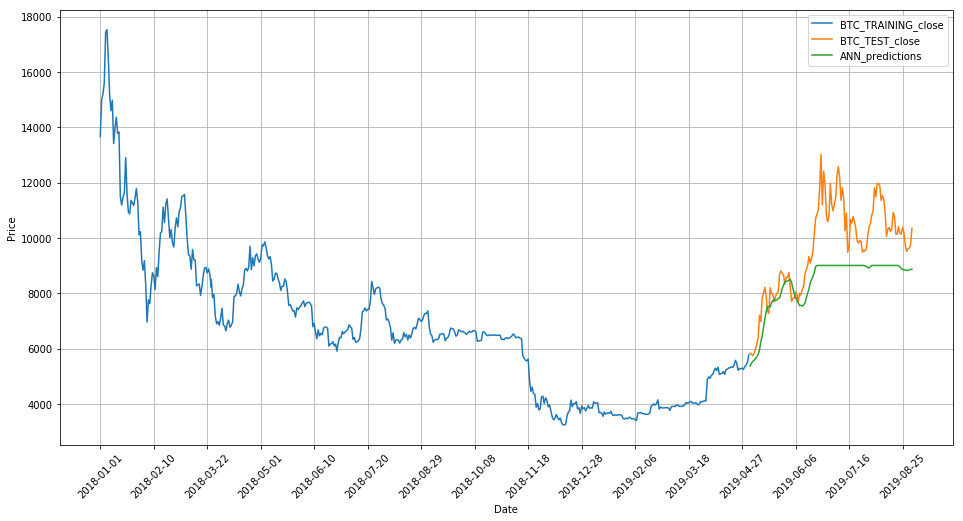

In [75]:
#2.8.7   ANN Model Forecast plot

plt.figure(figsize=(16,8))
plt.rcParams.update({'font.size':10})
plt.xticks(rotation=45)
ax = plt.axes()
ax.xaxis.set_major_locator(plt.MaxNLocator(20))
BTC_test['ANN_Predictions'] = closing_priceB
plt.plot(BTC_train['BTC_AdjClosing'],label='BTC_TRAINING_close')
plt.plot(BTC_test['BTC_AdjClosing'],label='BTC_TEST_close')
plt.plot(BTC_test['ANN_Predictions'],label='ANN_predictions')
plt.xlabel("Date")
 
plt.ylabel("Price") 
ax.grid(True)
plt.legend(loc='best')
plt.show()


In [76]:
#2.8.8   Correlation between the predicted via ANN and the actual 

corr_ANN = np.corrcoef(BTC_test['ANN_Predictions'].dropna().values, BTC_test['BTC_AdjClosing'].dropna().values)[0,1] 

print('correlation between %s and %s is %f'%('test_BTC_AdjClosing', 'ANN_Predictions',corr_ANN))

correlation between test_BTC_AdjClosing and ANN_Predictions is 0.865841


### IMPLICATION ###

*The ANN  model has the following results:*
    
*RMS = 2743.9675459199757*

*MAPE = 0.22765754098237567*

*MPE = -0.1928867665402384*

Correlation = 79.9%


Evidently the LSTM has the best result of all 4 (Four) tested models


In [77]:
#2.9  Correlation between the predicted BTC prices and the actual


#Correlation between the predicted via LSTM and the actual 
corr_LSTM = np.corrcoef(BTC_test['LSTM_Predictions'].dropna().values, BTC_test['BTC_AdjClosing'].dropna().values)[0,1] 

print('correlation between %s and %s is %f'%('test_BTC_AdjClosing', 'LSTM_Predictions',corr_LSTM))

#Correlation between the predicted via MA and the actual 
corr_MA = np.corrcoef(BTC_test['MA_Predictions'].dropna().values, BTC_test['BTC_AdjClosing'].dropna().values)[0,1] 

print('correlation between %s and %s is %f'%('test_BTC_AdjClosing', 'Moving_Average',corr_MA))

#Correlation between the predicted via ARIMA and the actual 

corr_ARIMA = np.corrcoef(forecast['Prediction'].dropna().values, BTC_test['BTC_AdjClosing'].dropna().values)[0,1] 

print('correlation between %s and %s is %f'%('test_BTC_AdjClosing', 'ARIMA_Predictions',corr_ARIMA))


#Correlation between the predicted via ANN and the actual 
corr_ANN = np.corrcoef(BTC_test['ANN_Predictions'].dropna().values, BTC_test['BTC_AdjClosing'].dropna().values)[0,1] 

print('correlation between %s and %s is %f'%('test_BTC_AdjClosing', 'ANN_Predictions',corr_ANN))

correlation between test_BTC_AdjClosing and LSTM_Predictions is 0.948012
correlation between test_BTC_AdjClosing and Moving_Average is 0.816826
correlation between test_BTC_AdjClosing and ARIMA_Predictions is 0.657145
correlation between test_BTC_AdjClosing and ANN_Predictions is 0.865841


***we consider the LSTM for the Second Crypto Currency in our Pair (Euthereum, ETH)***

In [78]:
ETH_AdjClosing.index = eth['Date']

In [79]:
#2.9a. split into train and validation/testing
ETH_train =ETH_AdjClosing[:488]
ETH_test = ETH_AdjClosing[488:]

In [80]:
print('\n Shape of training set:')
print(ETH_train.shape)
print('\n Shape of test set:')
print(ETH_test.shape)


 Shape of training set:
(488, 1)

 Shape of test set:
(122, 1)


In [81]:
np.random.seed(0)
##2.9b converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(ETH_AdjClosing)

In [82]:
##2.9c setting training and testing range
x_traine, y_traine = [], []
for i in range(80,len(ETH_train)):
    x_traine.append(scaled_data[i-80:i,0])
    y_traine.append(scaled_data[i,0])
x_traine, y_traine = np.array(x_traine), np.array(y_traine)

x_traine = np.reshape(x_traine, (x_traine.shape[0],x_traine.shape[1],1))

x_traine.shape

(408, 80, 1)

In [83]:
#2.9d create and fit the LSTM network
modele = Sequential()
modele.add(LSTM(units=13, return_sequences=True, input_shape=(x_traine.shape[1],1)))
modele.add(LSTM(units=3))
modele.add(Dense(1))

modele.compile(loss='mean_squared_error', optimizer='adam',metrics=['accuracy'])
modele.fit(x_traine, y_traine, epochs=13, batch_size=1, verbose=2)


Epoch 1/13
 - 36s - loss: 0.0057 - acc: 0.0025
Epoch 2/13
 - 34s - loss: 0.0018 - acc: 0.0025
Epoch 3/13
 - 34s - loss: 0.0015 - acc: 0.0025
Epoch 4/13
 - 34s - loss: 0.0012 - acc: 0.0025
Epoch 5/13
 - 34s - loss: 9.6356e-04 - acc: 0.0025
Epoch 6/13
 - 34s - loss: 7.5674e-04 - acc: 0.0025
Epoch 7/13
 - 35s - loss: 7.4560e-04 - acc: 0.0025
Epoch 8/13
 - 34s - loss: 6.9766e-04 - acc: 0.0025
Epoch 9/13
 - 34s - loss: 5.8830e-04 - acc: 0.0025
Epoch 10/13
 - 34s - loss: 5.8992e-04 - acc: 0.0025
Epoch 11/13
 - 34s - loss: 5.6509e-04 - acc: 0.0025
Epoch 12/13
 - 34s - loss: 5.1351e-04 - acc: 0.0025
Epoch 13/13
 - 35s - loss: 5.3282e-04 - acc: 0.0025


In [84]:
#2.9e  predicting 122 values, using past 80 from the train data
inputse = ETH_AdjClosing[len(ETH_AdjClosing) - len(ETH_test) - 80:].values
inputse = inputse.reshape(-1,1)
inputse  = scaler.transform(inputse)

In [85]:
print(modele.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 80, 13)            780       
_________________________________________________________________
lstm_4 (LSTM)                (None, 3)                 204       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 4         
Total params: 988
Trainable params: 988
Non-trainable params: 0
_________________________________________________________________
None


In [86]:
#2.9f setting testing range for ETH

X_teste = []
for i in range(80,inputse.shape[0]):
    X_teste.append(inputse[i-80:i,0])
X_teste = np.array(X_teste)
print(X_teste.shape)
X_teste = np.reshape(X_teste, (X_teste.shape[0],X_teste.shape[1],1))
closing_pricee = model.predict(X_teste)
closing_pricee = scaler.inverse_transform(closing_pricee)

(122, 80)


In [87]:
#2.9g  RMSE for ETH

rms=np.sqrt(np.mean(np.power((ETH_test['ETH_AdjClosing'].values-closing_pricee),2)))
rms

59.69358157740297

In [88]:
#2.9h  MAPE for ETH

mape = np.mean(np.abs(closing_pricee - ETH_test['ETH_AdjClosing'].values)/np.abs(ETH_test['ETH_AdjClosing'].values))
mape

0.2125862749491675

In [89]:
#2.9i   MPE for ETH
mpe = np.mean((closing_pricee - ETH_test['ETH_AdjClosing'].values)/ETH_test['ETH_AdjClosing'].values)
mpe

0.04048244536708451

C:\Users\DELL PC\Anaconda3\anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
C:\Users\DELL PC\Anaconda3\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


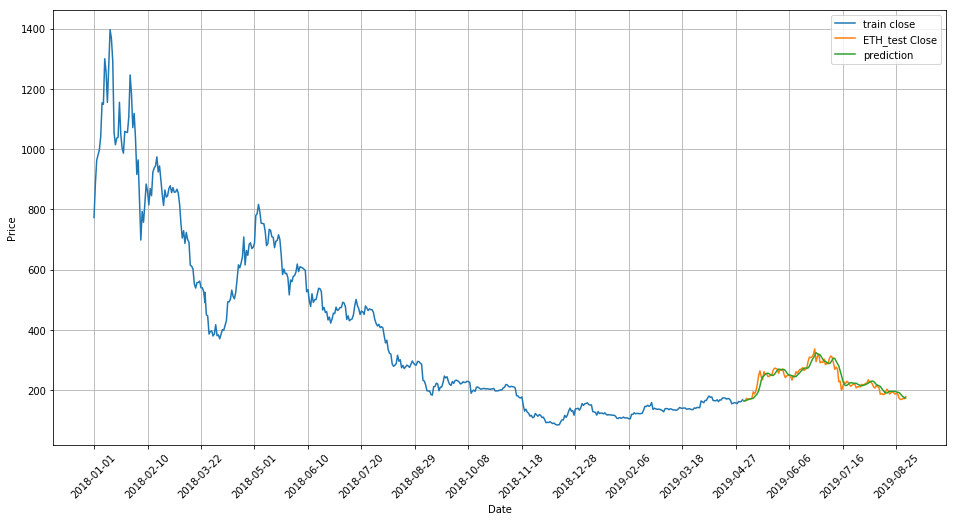

In [90]:
#2.9j   LST  Model Forecast plot for ETH

plt.figure(figsize=(16,8))
plt.rcParams.update({'font.size':10})
plt.xticks(rotation=45)
ax = plt.axes()
ax.xaxis.set_major_locator(plt.MaxNLocator(20))
ETH_test['Predictions'] = closing_pricee
plt.plot(ETH_train['ETH_AdjClosing'],label='train close')
plt.plot(ETH_test['ETH_AdjClosing'],label='ETH_test Close')
plt.plot(ETH_test['Predictions'],label='prediction')
plt.xlabel("Date")

plt.ylabel("Price") 

ax.grid(True)
plt.legend(loc='best')
plt.show()

In [91]:
#2.9k  Correlation between the predicted ETH prices via LSTM and the actual 
corr_ETH_LSTM = np.corrcoef(ETH_test['Predictions'].dropna().values,ETH_test['ETH_AdjClosing'].dropna().values)[0,1] 

print('correlation between %s and %s is %f'%('test_ETH_AdjClosing', 'LSTM_Predictions',corr_ETH_LSTM))

correlation between test_ETH_AdjClosing and LSTM_Predictions is 0.933436


C:\Users\DELL PC\Anaconda3\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


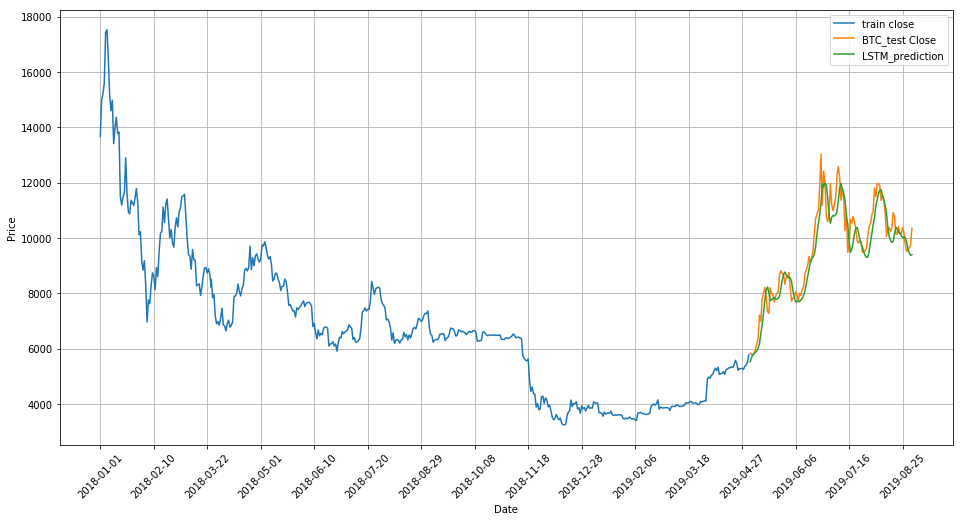

In [92]:
# 2.4.8 LSTM Forecast Plot

plt.figure(figsize=(16,8))
plt.rcParams.update({'font.size':10})
plt.xticks(rotation=45)
ax = plt.axes()
ax.xaxis.set_major_locator(plt.MaxNLocator(20))
BTC_test['LSTM_Predictions'] = closing_priceL
plt.plot(BTC_train['BTC_AdjClosing'],label='train close')
plt.plot(BTC_test['BTC_AdjClosing'],label='BTC_test Close')
plt.plot(BTC_test['LSTM_Predictions'],label='LSTM_prediction')
plt.xlabel("Date")

plt.ylabel("Price") 
ax.grid(True)
plt.legend(loc='best')
plt.show()


## Bitcoin Price Forecasting Conclusion ##

Evidently we will adopt the LSTM  as it births the best result for our assigment 

Machine learning and deep learning techniques can possibly facilitate the entire procedures of investigating enormous pieces of information, spotting critical examples and producing a solitary yield that explores investors towards a specific choice dependent on anticipated resource costs. We perceive that numerous Financial Enginners and Researchers are spending restless evenings attempting to improve the presentation of Machine Learning  and Deep learning models. 

Kindly note that crypto currency price can be influenced by numerous other profoundly interrelated elements. these elements include but not limited to;

Government Policies, 

Exchange/ Trading Platform utillized for the Trade, 

Demand and supply for Bitcoin and/or Ethereum,

Availability of other (Competting) Crypto-Currencies

News on Common components like environmental change, dry season, tropical storms, floods, tremors and different elements like demonetization or merger/demerger of the associations could likewise influence the price of Bitcoin and/or Ethereum. 

Huge numbers of these variables can be hard to envision and may require extra instruments to appropriately estimate them

We propose to open source our design to offer a chance to any  financial analysts or Financial Engineers with similar interest to  improve this work.


### PROJECT :CRYPTOCURRENCY TRADING-PAIR FORECASTING, USING MACHINE LEARNING AND DEEP LEARNING TECHNIQUE. ###



**3.DEVELOP A PROPOSED TRADING STRATEGY**

we begin this section with the check for BTC-ETH Non-Stationary Prices.
here we employ the Augmented Dickey-Fuller Stationary test

In [93]:
# 3.1 BTC-ETH Non-Stationary Prices

print('== BTC Prices Augmented Dickey-Fuller Test ==')
print('')
print(at.ADF(dt['BTC_RET'], trend='ct'))
print('')
print('== ETH Prices Augmented Dickey-Fuller Test ==')
print('')
print(at.ADF(dt['ETH_RET'], trend='ct'))
print('')

== BTC Prices Augmented Dickey-Fuller Test ==

   Augmented Dickey-Fuller Results   
Test Statistic                -13.495
P-value                         0.000
Lags                                2
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: -3.97 (1%), -3.42 (5%), -3.13 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.

== ETH Prices Augmented Dickey-Fuller Test ==

   Augmented Dickey-Fuller Results   
Test Statistic                -12.928
P-value                         0.000
Lags                                2
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: -3.97 (1%), -3.42 (5%), -3.13 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.



In [94]:
# 3.2. BTC-ETH Stationary Price Differences
print('== BTC Prices  Differences Augmented Dickey-Fuller Test ==')
print('')
print(at.ADF(dt['BTC_RET'].diff(1).dropna(), trend='ct'))
print('')
print('== ETH Prices Differences Augmented Dickey-Fuller Test ==')
print('')
print(at.ADF(dt['ETH_RET'].diff(1).dropna(), trend='ct'))
print('')


== BTC Prices  Differences Augmented Dickey-Fuller Test ==

   Augmented Dickey-Fuller Results   
Test Statistic                -10.050
P-value                         0.000
Lags                               17
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: -3.97 (1%), -3.42 (5%), -3.13 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.

== ETH Prices Differences Augmented Dickey-Fuller Test ==

   Augmented Dickey-Fuller Results   
Test Statistic                -11.049
P-value                         0.000
Lags                               15
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: -3.97 (1%), -3.42 (5%), -3.13 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.



In [95]:
# 3.3 BTC-ETH Spread Co-Integration Tests
print('== BTC-ETH Spread Augmented Dickey-Fuller Co-Integration Test ==')
print('')
print(at.ADF(BTC_ETH, trend='ct'))
print('')
print('== BTC-ETH Spread Phillips-Perron Co-Integration Test ==')
print('')
print(at.PhillipsPerron(BTC_ETH, trend='ct', test_type='rho'))
print('')


== BTC-ETH Spread Augmented Dickey-Fuller Co-Integration Test ==

   Augmented Dickey-Fuller Results   
Test Statistic                 -9.570
P-value                         0.000
Lags                                4
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: -3.97 (1%), -3.42 (5%), -3.13 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.

== BTC-ETH Spread Phillips-Perron Co-Integration Test ==

     Phillips-Perron Test (Z-rho)    
Test Statistic               -650.396
P-value                         0.000
Lags                               19
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: -28.98 (1%), -21.50 (5%), -18.09 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.



Then we split our Bitcoin Returns and Ethereum Returns into the training data set and the testing data set.

Afterwhich we concated the tests into the tests data set.

In [96]:
#3.4 split into train and validation/testing
btc_R_train = dt['BTC_RET'][:488]
btc_R_test =  dt['BTC_RET'][488:]
eth_R_train = dt['ETH_RET'][:488]
eth_R_test =  dt['ETH_RET'][488:]

tests= pd.concat([btc_R_test ,eth_R_test ], ignore_index=False,axis=1)

tests.head()

,BTC_RET,ETH_RET
Date,,
2019-05-05,-0.008438,0.056301
2019-05-06,0.014390,-0.016533
2019-05-07,0.026238,0.006770
2019-05-08,0.032106,-0.003854
2019-05-09,0.033091,0.016756


we decided to take a more techincal approach to the calculation of the spread, Z-score for the spread and then Rolling Spread z-score.





In [98]:
#3.5.1 calculating the new spread
new_spread= btc_R_test - rg.OLS(btc_R_train, eth_R_train).fit().params[0] * eth_R_test

In [99]:
# 3.5.2 new_spread Co-Integration Tests
print('== BTC-ETH Spread Augmented Dickey-Fuller Co-Integration Test ==')
print('')
print(at.ADF(new_spread, trend='ct'))
print('')
print('== BTC-ETH new_spread Phillips-Perron Co-Integration Test ==')
print('')
print(at.PhillipsPerron(new_spread, trend='ct', test_type='rho'))
print('')

== BTC-ETH Spread Augmented Dickey-Fuller Co-Integration Test ==

   Augmented Dickey-Fuller Results   
Test Statistic                -10.822
P-value                         0.000
Lags                                0
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: -4.04 (1%), -3.45 (5%), -3.15 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.

== BTC-ETH new_spread Phillips-Perron Co-Integration Test ==

     Phillips-Perron Test (Z-rho)    
Test Statistic                -97.898
P-value                         0.000
Lags                               13
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: -27.50 (1%), -20.66 (5%), -17.49 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.



In [100]:
#3.5.3 mean of new spread
new_spread.mean()

0.004815160676906235

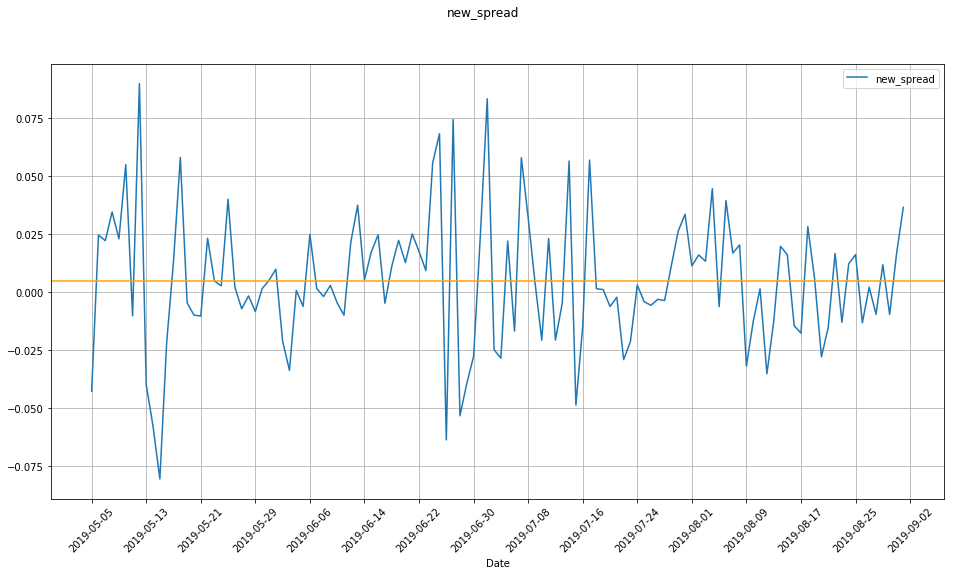

In [101]:
# 3.5.4. BTC-ETH  Spread  Chart
plt.figure(figsize=(16,8))
plt.rcParams.update({'font.size':10})
plt.xticks(rotation=45)
ax = plt.axes()
ax.xaxis.set_major_locator(plt.MaxNLocator(20))
ax.plot(new_spread, label='new_spread')
ax.axhline(new_spread.mean(), color='orange')
ax.legend(loc='best')
plt.xlabel("Date")
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.suptitle('new_spread')
ax.grid(True)
plt.show()

In [102]:
# 3.5.5. BTC_ETH Rolling Spread Z-Score Calculation

t2train = btc_R_test - rg.OLS(btc_R_train, eth_R_train).fit().params[0] * eth_R_test
BTC_ETH_ROLL_RET = (t2train - t2train.rolling(window=55).mean()) / t2train.rolling(window=55).std()

In [103]:
#3.5.6  preparing Spread's Z-score  for Co-Integration Tests
z_score_t =BTC_ETH_ROLL_RET.dropna()

In [104]:
#3.5.7. Spread's Z-score Co-Integration Tests
print('== BTC-ETH Spread Augmented Dickey-Fuller Co-Integration Test ==')
print('')
print(at.ADF(z_score_t, trend='ct'))
print('')
print('== BTC-ETH new_spread Phillips-Perron Co-Integration Test ==')
print('')
print(at.PhillipsPerron(z_score_t, trend='ct', test_type='rho'))
print('')

== BTC-ETH Spread Augmented Dickey-Fuller Co-Integration Test ==

   Augmented Dickey-Fuller Results   
Test Statistic                 -5.130
P-value                         0.000
Lags                                2
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: -4.11 (1%), -3.48 (5%), -3.17 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.

== BTC-ETH new_spread Phillips-Perron Co-Integration Test ==

     Phillips-Perron Test (Z-rho)    
Test Statistic                -50.193
P-value                         0.000
Lags                               11
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: -26.09 (1%), -19.85 (5%), -16.90 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.



In [105]:
#3.5.8  calculating for beta (Hedge)

beta= rg.OLS(btc_R_train, eth_R_train).fit().params[0]
beta

0.6104983546646641

In [106]:
#3.5.9 calculating the mean for the Rolling Z-score
BTC_ETH_ROLL_RET.mean()

-0.0894847581392715

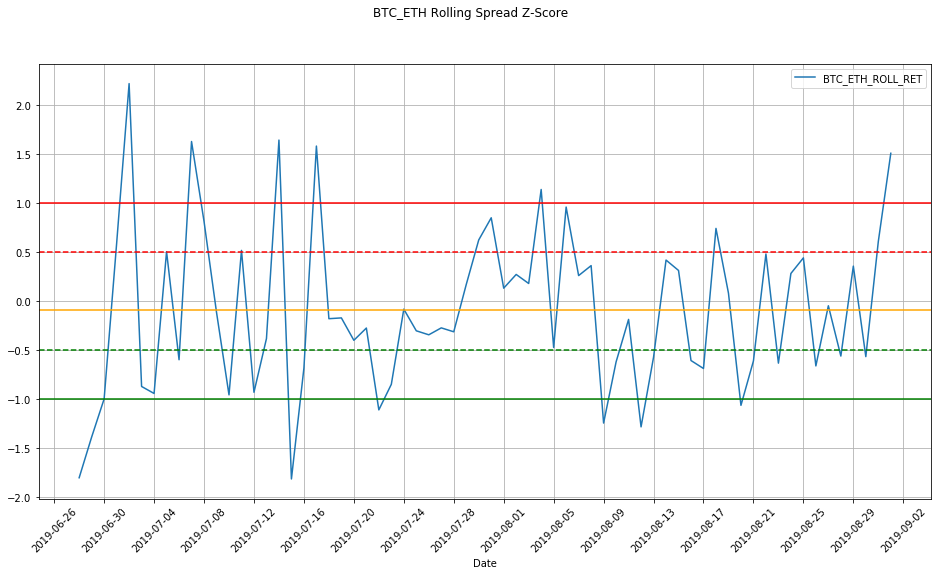

== BTC_ETH Trading Strategy Position ==

            BTC_ETH_ROLL_RET  ftestsig2  ftestpos2
Date                                              
2019-05-13               NaN        0.0        NaN
2019-05-14               NaN        0.0        NaN
2019-05-15               NaN        0.0        NaN
2019-05-16               NaN        0.0        NaN
2019-05-17               NaN        0.0        NaN
...                      ...        ...        ...
2019-08-28         -0.561268       -1.0        0.0
2019-08-29          0.358123        0.0        0.0
2019-08-30         -0.567011       -1.0        0.0
2019-08-31          0.609149        0.0        0.0
2019-09-01          1.511466       -1.0        0.0

[112 rows x 3 columns]



In [107]:
# 3.6.0 BTC_ETH Rolling Spread Z-Score Chart
plt.figure(figsize=(16,8))
plt.rcParams.update({'font.size':10})
plt.xticks(rotation=45)
ax = plt.axes()
ax.xaxis.set_major_locator(plt.MaxNLocator(20))
ax.plot(BTC_ETH_ROLL_RET, label='BTC_ETH_ROLL_RET')
ax.axhline((-1), color='green')
ax.axhline((-0.5), color='green', linestyle='--')
ax.axhline((1), color='red')
ax.axhline((0.5), color='red', linestyle='--')
ax.axhline(BTC_ETH_ROLL_RET.mean(), color='orange')
plt.suptitle('BTC_ETH Rolling Spread Z-Score')
plt.xlabel("Date")
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.legend(loc='best')
ax.grid(True)
plt.show()

# 3.6.1. BTC_ETH Trading Strategy Signals
tests.insert(len(tests.columns), 'BTC_ETH_ROLL_RET', BTC_ETH_ROLL_RET)
tests.insert(len(tests.columns), 'BTC_ETH_ROLL_RET(-1)', BTC_ETH_ROLL_RET.shift(1))
tests.insert(len(tests.columns), 'BTC_ETH_ROLL_RET(-2)', BTC_ETH_ROLL_RET.shift(2))
ftestsig2 = 0.0
ftestsig2a = []

for i in tests.index.values:
    if tests.at[i, 'BTC_ETH_ROLL_RET(-2)'] > -1 and tests.at[i, 'BTC_ETH_ROLL_RET(-1)'] < -1:
        ftestsig2 = -2
    elif tests.at[i, 'BTC_ETH_ROLL_RET(-2)'] < -0.5 and tests.at[i, 'BTC_ETH_ROLL_RET(-1)'] > -0.5:
        ftestsig2 = -1
    elif tests.at[i, 'BTC_ETH_ROLL_RET(-2)'] < 1 and tests.at[i, 'BTC_ETH_ROLL_RET(-1)'] > 1:
        ftestsig2 = 2
    elif tests.at[i, 'BTC_ETH_ROLL_RET(-2)'] > 0.5 and tests.at[i, 'BTC_ETH_ROLL_RET(-1)'] < 0.5:
        ftestsig2 = 1
    else:
        ftestsig2 = 0.0
    ftestsig2a.append(ftestsig2)
tests.insert(len(tests.columns), 'ftestsig2', ftestsig2a)

# 3.6.2. BTC_ETH Trading Strategy Positions
ftestpos2 = 0.0
ftestpos2a = []

for i in tests.index.values:
    if tests.at[i, 'ftestsig2'] == -2:
        ftestpos2 = 1
    elif tests.at[i, 'ftestsig2'] == -1:
        ftestpos2 = 0.0
    elif tests.at[i, 'ftestsig2'] == 2:
        ftestpos2 = -1
    elif tests.at[i, 'ftestsig2'] == 1:
        ftestpos2 = 0.0
    else:
        ftestpos2 = None
    ftestpos2a.append(ftestpos2)
tests.insert(len(tests.columns), 'ftestpos2', ftestpos2a)
tests = tests.fillna(method='ffill')

print('== BTC_ETH Trading Strategy Position ==')
print('')
print(tests.loc['2019-05-13':, ['BTC_ETH_ROLL_RET', 'ftestsig2', 'ftestpos2']])
print('')


In [108]:
#3.6.3 testing our trading logic
(tests.loc['2019-05-13':, ['BTC_ETH_ROLL_RET', 'ftestsig2', 'ftestpos2']]).tail(15)

,BTC_ETH_ROLL_RET,ftestsig2,ftestpos2
Date,,,
2019-08-18,0.743537,0.0,0.0
2019-08-19,0.081729,-1.0,0.0
2019-08-20,-1.064928,1.0,0.0
2019-08-21,-0.611179,-2.0,1.0
2019-08-22,0.482117,0.0,1.0
2019-08-23,-0.633690,-1.0,0.0
2019-08-24,0.282996,0.0,0.0
2019-08-25,0.442265,-1.0,0.0
2019-08-26,-0.662026,0.0,0.0


C:\Users\DELL PC\Anaconda3\anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


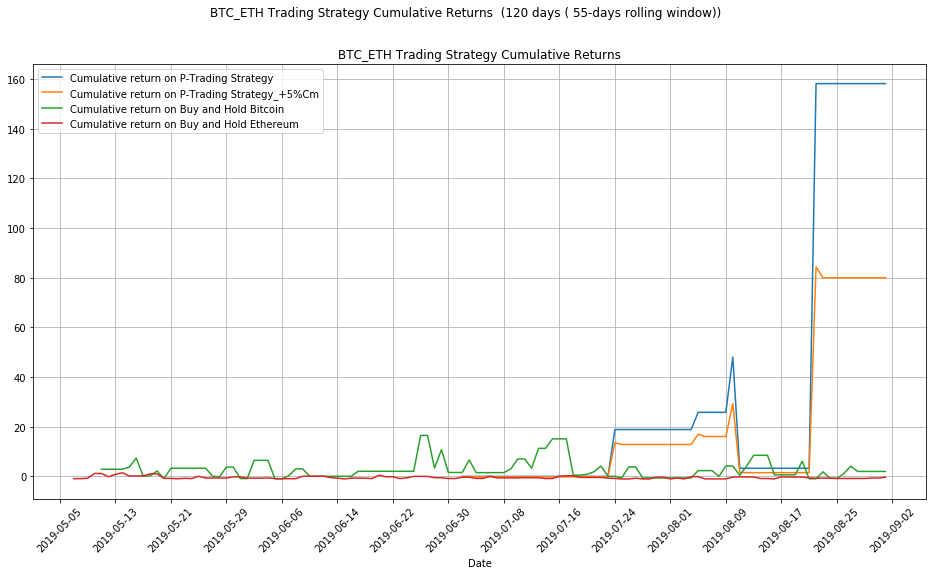


== BTC_ETH Strategy Performance Summary ==

                      0                   1                         2  \
0          Test-Period:  P-Trading Strategy  P-Trading Strategy_+5%Cm   
1                Return             158.133                   79.9924   
2    Standard Deviation             57.2392                   57.2327   
3  Sharpe Ratio (Rf=0%)              2.7627                    1.3977   

                  3                  4  
0  Buy&Hold Bitcoin  Buy&Hold Ethereum  
1            2.0216             -0.309  
2            116.55            1069.04  
3            0.0173            -0.0003  


In [109]:
# 3.7.0 Pairs Strategy Performance Comparison

# 3.7.1. BTC_ETH Strategy Daily Returns

# BTC_ETH Strategy Spread Returns
r_test_BTC = btc_R_test.pct_change(1).dropna()
r_test_ETH = eth_R_test.pct_change(1).dropna()
rt2train = r_test_BTC - rg.OLS(btc_R_train, eth_R_train).fit().params[0] * r_test_ETH

# 3.7.2 BTC_ETH Strategy Without Trading Commissions Returns
r_Stest2 = rt2train * tests['ftestpos2']

#3.7.3 BTC_ETH Strategy With Trading Commissions Returns (5% Per Trade)
tests.insert(len(tests.columns), 'ftestpos2(-1)', tests['ftestpos2'].shift(1))
f_testfc2 = 0.00
f_testfc2a = []

for i in tests.index.values:
    if (tests.at[i, 'ftestsig2'] == -1 or tests.at[i, 'ftestsig2'] == -2 or tests.at[i, 'ftestsig2'] == 1
        or tests.at[i, 'ftestsig2'] == 2) and tests.at[i, 'ftestpos2'] != tests.at[i, 'ftestpos2(-1)']:
        f_testfc2 = 0.05
    else:
        f_testfc2 = 0.00
    f_testfc2a.append(f_testfc2)
tests.insert(len(tests.columns), 'f_testfc2', f_testfc2a)
r_Stest2c = r_Stest2 - tests['f_testfc2']

# 3.7.4. BTC_ETH Strategy Cummulative 120 days Returns with 55-days rolling window

# 3.7.5 BTC_ETH Strategy Cumulative Daily Returns Calculation
Ret_test_cum = np.cumprod(r_Stest2 + 1) ** (122 / len(tests)) - 1
Ret_test_cumc = np.cumprod(r_Stest2c + 1) ** (122 / len(tests)) - 1
r_test_BTCcuma = np.cumprod(r_test_BTC + 1) ** (122 / len(tests)) - 1
r_test_ETHcuma = np.cumprod(r_test_ETH + 1) ** (122 / len(tests)) - 1


Ret_test_cum = Ret_test_cum.fillna(method='ffill')
Ret_test_cumc = Ret_test_cumc.fillna(method='ffill')
r_test_BTCcuma = r_test_BTCcuma.fillna(method='ffill')
r_test_ETHcuma = r_test_ETHcuma.fillna(method='ffill')



# 3.7.6 BTC_ETH Strategy Cummulative 120 days ( 55-days rolling window) Returns Chart
plt.figure(figsize=(16,8))
plt.rcParams.update({'font.size':10})
plt.xticks(rotation=45)
ax = plt.axes()
ax.xaxis.set_major_locator(plt.MaxNLocator(20))
plt.plot(Ret_test_cum, label='Cumulative return on P-Trading Strategy')
plt.plot(Ret_test_cumc, label='Cumulative return on P-Trading Strategy_+5%Cm')
plt.plot(r_test_BTCcuma, label='Cumulative return on Buy and Hold Bitcoin')
plt.plot(r_test_ETHcuma, label='Cumulative return on Buy and Hold Ethereum')
plt.title('BTC_ETH Trading Strategy Cumulative Returns')
plt.xlabel("Date")
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.suptitle('BTC_ETH Trading Strategy Cumulative Returns  (120 days ( 55-days rolling window))')
ax.legend(loc='best')
ax.grid(True)

plt.show()

# 3.7.7. BTC_ETH Strategy Performance Summary
results2 = [{'0': 'Test-Period:', '1': 'P-Trading Strategy', '2': 'P-Trading Strategy_+5%Cm', '3': 'Buy&Hold Bitcoin', '4': 'Buy&Hold Ethereum'},
        {'0': 'Return', '1': np.round(Ret_test_cum[-1], 4),
         '2':np.round(Ret_test_cumc[-1], 4),
         '3': np.round(r_test_BTCcuma[-1], 4),
         '4': np.round(r_test_ETHcuma[-1], 4)},
        {'0': 'Standard Deviation', '1': np.round(np.std(r_Stest2) * np.sqrt(122), 4),
         '2': np.round(np.std(r_Stest2c) * np.sqrt(122), 4),
         '3': np.round(np.std(r_test_BTC) * np.sqrt(122), 4),
         '4': np.round(np.std(r_test_ETH) * np.sqrt(122), 4)},
        {'0': 'Sharpe Ratio (Rf=0%)', '1': np.round(Ret_test_cum[-1] / (np.std(r_Stest2) * np.sqrt(122)), 4),
         '2': np.round(Ret_test_cumc[-1] / (np.std(r_Stest2c) * np.sqrt(122)), 4),
         '3': np.round(r_test_BTCcuma[-1] / (np.std(r_test_BTC) * np.sqrt(122)), 4),
         '4': np.round(r_test_ETHcuma[-1] / (np.std(r_test_ETH) * np.sqrt(122)), 4)}]
table2 = pd.DataFrame(results2)
print('')
print('== BTC_ETH Strategy Performance Summary ==')
print('')
print(table2)

In [110]:
#3.8 Analysing Profitabiliy of the Strategy 

output=pd.Series(Ret_test_cum)

Max_ret=pd.Series.max(output, axis=None, skipna=None, level=None, numeric_only=None)
Min_ret=pd.Series.min(output, axis=None, skipna=None, level=None, numeric_only=None)

Min_ret_count=len(output.loc[(output < 0)])
Max_ret_count =len(output.loc[(output > 0)])
Optimal_trade=((Max_ret_count)/(len(output)))*100

print('Highest positive daily return is %f'%(Max_ret))
print('Number of positive daily return is %f'%(Max_ret_count))
print('The Percentage of postive returns with this strategy for the period is %f'%(Optimal_trade),'%')
print('The 120 Trade Day Return of  %f'%((np.round(Ret_test_cum[-1], 4))*100),'%')



Highest positive daily return is 158.133184
Number of positive daily return is 61.000000
The Percentage of postive returns with this strategy for the period is 50.833333 %
The 120 Trade Day Return of  15813.320000 %
